# Practical Assignment 1

#### Image Adhikari

## Chapter 1 - Getting started with Python Machine Learning

## 1. Learning Numpy

In [1]:
import numpy as np
np.version.full_version

'1.21.5'

In [2]:
a = np.array([1,3,5,7,11,13,15,17])

In [3]:
a

array([ 1,  3,  5,  7, 11, 13, 15, 17])

In [4]:
a.ndim

1

In [5]:
a.shape

(8,)

In [6]:
# Changing array size. Reshape, but dos not change values
b = a.reshape(4,2)

In [7]:
b

array([[ 1,  3],
       [ 5,  7],
       [11, 13],
       [15, 17]])

In [8]:
b.ndim

2

In [9]:
b.shape

(4, 2)

In [10]:
b[1][0] = 0

In [11]:
b

array([[ 1,  3],
       [ 0,  7],
       [11, 13],
       [15, 17]])

In [12]:
a

array([ 1,  3,  0,  7, 11, 13, 15, 17])

In [13]:
c = a.reshape(4,2).copy()

In [14]:
c

array([[ 1,  3],
       [ 0,  7],
       [11, 13],
       [15, 17]])

In [15]:
c[0][1] = 4

In [16]:
c

array([[ 1,  4],
       [ 0,  7],
       [11, 13],
       [15, 17]])

In [17]:
a

array([ 1,  3,  0,  7, 11, 13, 15, 17])

In [18]:
d = np.array([1,2,3,4,5])

In [19]:
d*2

array([ 2,  4,  6,  8, 10])

In [20]:
d**2

array([ 1,  4,  9, 16, 25], dtype=int32)

In [21]:
[1,2,3,4,5]*2

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

In [22]:
try:
    [1,2,3,4,5]**2 # does not work on normal lists
except TypeError as e:
    print("Exception: %s"%e)

Exception: unsupported operand type(s) for ** or pow(): 'list' and 'int'


### Indexing in Numpy

In [23]:
a

array([ 1,  3,  0,  7, 11, 13, 15, 17])

In [24]:
a[np.array([2,3,4])]


array([ 0,  7, 11])

In [25]:
a > 5

array([False, False, False,  True,  True,  True,  True,  True])

In [26]:
a[a>5]

array([ 7, 11, 13, 15, 17])

In [27]:
a[a>5] = 5
a

array([1, 3, 0, 5, 5, 5, 5, 5])

In [28]:
a.clip(3,4)

array([3, 3, 3, 4, 4, 4, 4, 4])

### Handling nonexistent values

Handling invalid datas using `numpy.NAN`.

In [29]:
c = np.array([1, 2, np.NAN, 3, 4])

In [30]:
c

array([ 1.,  2., nan,  3.,  4.])

In [31]:
np.isnan(c)

array([False, False,  True, False, False])

In [32]:
c[~np.isnan(c)]

array([1., 2., 3., 4.])

In [33]:
np.mean(c[~np.isnan(c)])

2.5

---

## 2. Learning SciPy

In [34]:
import scipy

In [35]:
scipy.version.full_version

'1.7.3'

In [36]:
scipy.dot is np.dot

False

In [37]:
scipy?

---

## 3. First application of machine learning

### Generating dummy web traffic data

### This script generates web traffic data for our hypothetical web startup "MLaaS"

In [38]:
import os
from scipy.stats import gamma
import matplotlib.pyplot as plt
%matplotlib inline

DATA_DIR = os.path.join(os.getcwd(), "data")
CHART_DIR = os.path.join(os.getcwd(), "charts")

for d in [DATA_DIR, CHART_DIR]:
    if not os.path.exists(d):
        os.mkdir(d)

np.random.seed(3)  # to reproduce the data later on

def gen_web_traffic_data():
    '''
    This function generates some fake data that first shows a weekly pattern 
    for a couple weeks before it grows exponentially.
    '''
    x = np.arange(1, 31*24)
    y = np.array(200*(np.sin(2*np.pi*x/(7*24))), dtype=np.float32)
    y += gamma.rvs(15, loc=0, scale=100, size=len(x))
    y += 2 * np.exp(x/100.0)
    y = np.ma.array(y, mask=[y<0])

    # We introduce some "real-world" data, to later demonstrate how to clean 
    # it conveniently.
    y[[2,23,48,95,154,180,181,210]] = np.nan

    return x, y

def plot_web_traffic(x, y, models=None, mx=None, ymax=None, fig_idx=None):
    '''
    Plot the web traffic (y) over time (x). 
    
    If models is given, it is expected to be a list fitted models,
    which will be plotted as well (used later in this chapter).
    '''
    plt.figure(figsize=(12,6), dpi=300) # width and height of the plot in inches
    plt.scatter(x, y, s=10)
    plt.title("Web traffic over the last month")
    plt.xlabel("Time")
    plt.ylabel("Hits/hour")
    plt.xticks([w*7*24 for w in range(20)], 
               ['week %i' %w for w in range(20)])
    
    if models:
        colors = ['g', 'k', 'b', 'm', 'r']
        linestyles = ['-', '-.', '--', ':', '-']

        if mx is None:
            mx = np.linspace(0, x[-1], 1000)
        for model, style, color in zip(models, linestyles, colors):
            plt.plot(mx, model(mx), linestyle=style, linewidth=2, c=color)

        plt.legend(["d=%i" % m.order for m in models], loc="upper left")
        
    plt.autoscale()
    if ymax:
        plt.ylim(ymax=ymax)

    plt.grid()
    plt.ylim(ymin=0)
    
    if fig_idx is not None:
        plt.savefig(os.path.join(CHART_DIR, "B09124_01_%s.png" % fig_idx))
    

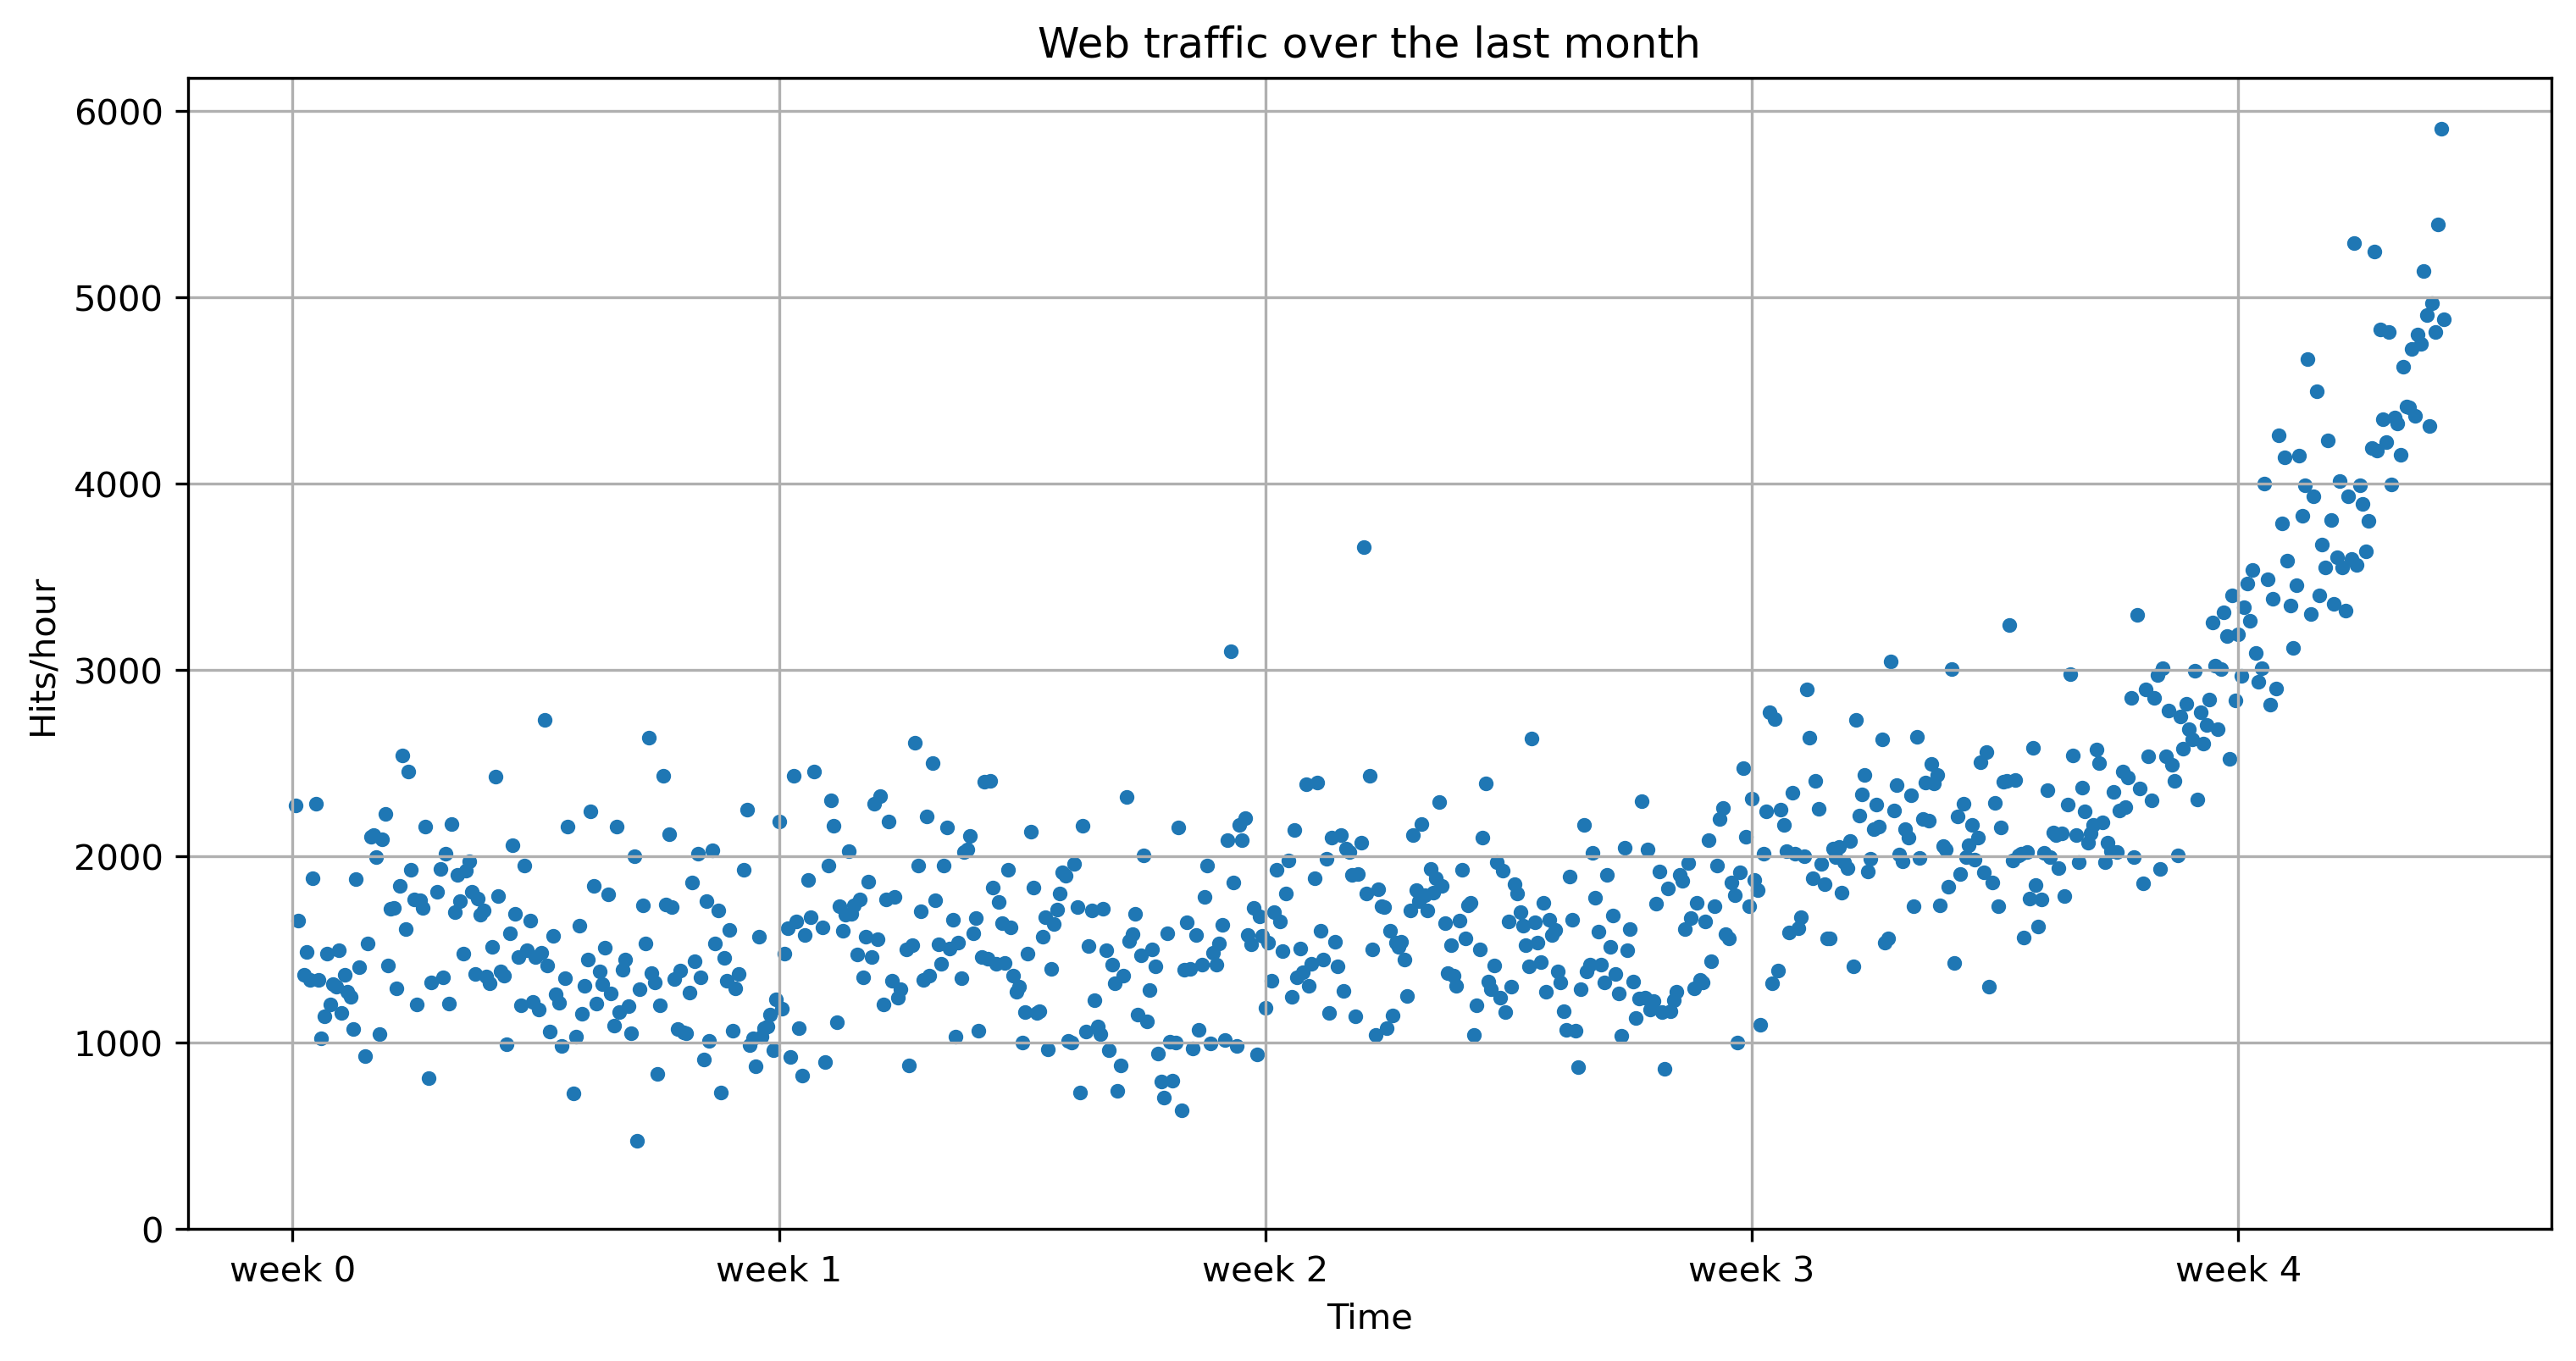

In [39]:
x, y = gen_web_traffic_data()
np.savetxt(os.path.join(DATA_DIR, "web_traffic.tsv"), 
           list(zip(x, y)), delimiter="\t", fmt="%f")
    
plot_web_traffic(x, y, fig_idx="01")

### Reding in the data and cleaning it

In [40]:
data = np.genfromtxt(os.path.join(DATA_DIR, "web_traffic.tsv"), delimiter="\t")


In [41]:
print(data[:15])

[[1.00000000e+00 2.27333106e+03]
 [2.00000000e+00 1.65725549e+03]
 [3.00000000e+00            nan]
 [4.00000000e+00 1.36684644e+03]
 [5.00000000e+00 1.48923438e+03]
 [6.00000000e+00 1.33802002e+03]
 [7.00000000e+00 1.88464734e+03]
 [8.00000000e+00 2.28475415e+03]
 [9.00000000e+00 1.33581091e+03]
 [1.00000000e+01 1.02583240e+03]
 [1.10000000e+01 1.14024109e+03]
 [1.20000000e+01 1.47834180e+03]
 [1.30000000e+01 1.20421838e+03]
 [1.40000000e+01 1.31250635e+03]
 [1.50000000e+01 1.30021887e+03]]


In [42]:
data.shape

(743, 2)

In [43]:
np.sum(np.isnan(x))

0

In [44]:
np.sum(np.isnan(y))

8

In [45]:
x = x[~np.isnan(y)]
y = y[~np.isnan(y)]

In [46]:
fp1 = np.polyfit(x, y, 1)

In [47]:
print("Model parameters: %s" % fp1)

Model parameters: [  2.58462016 996.50674246]


In [48]:
# We use squared distance as the error.
def error(f, x, y):
    return np.sum((f(x)-y)**2)

In [49]:
f1 = np.poly1d(fp1)
print(error(f1, x, y))

319531507.00812596


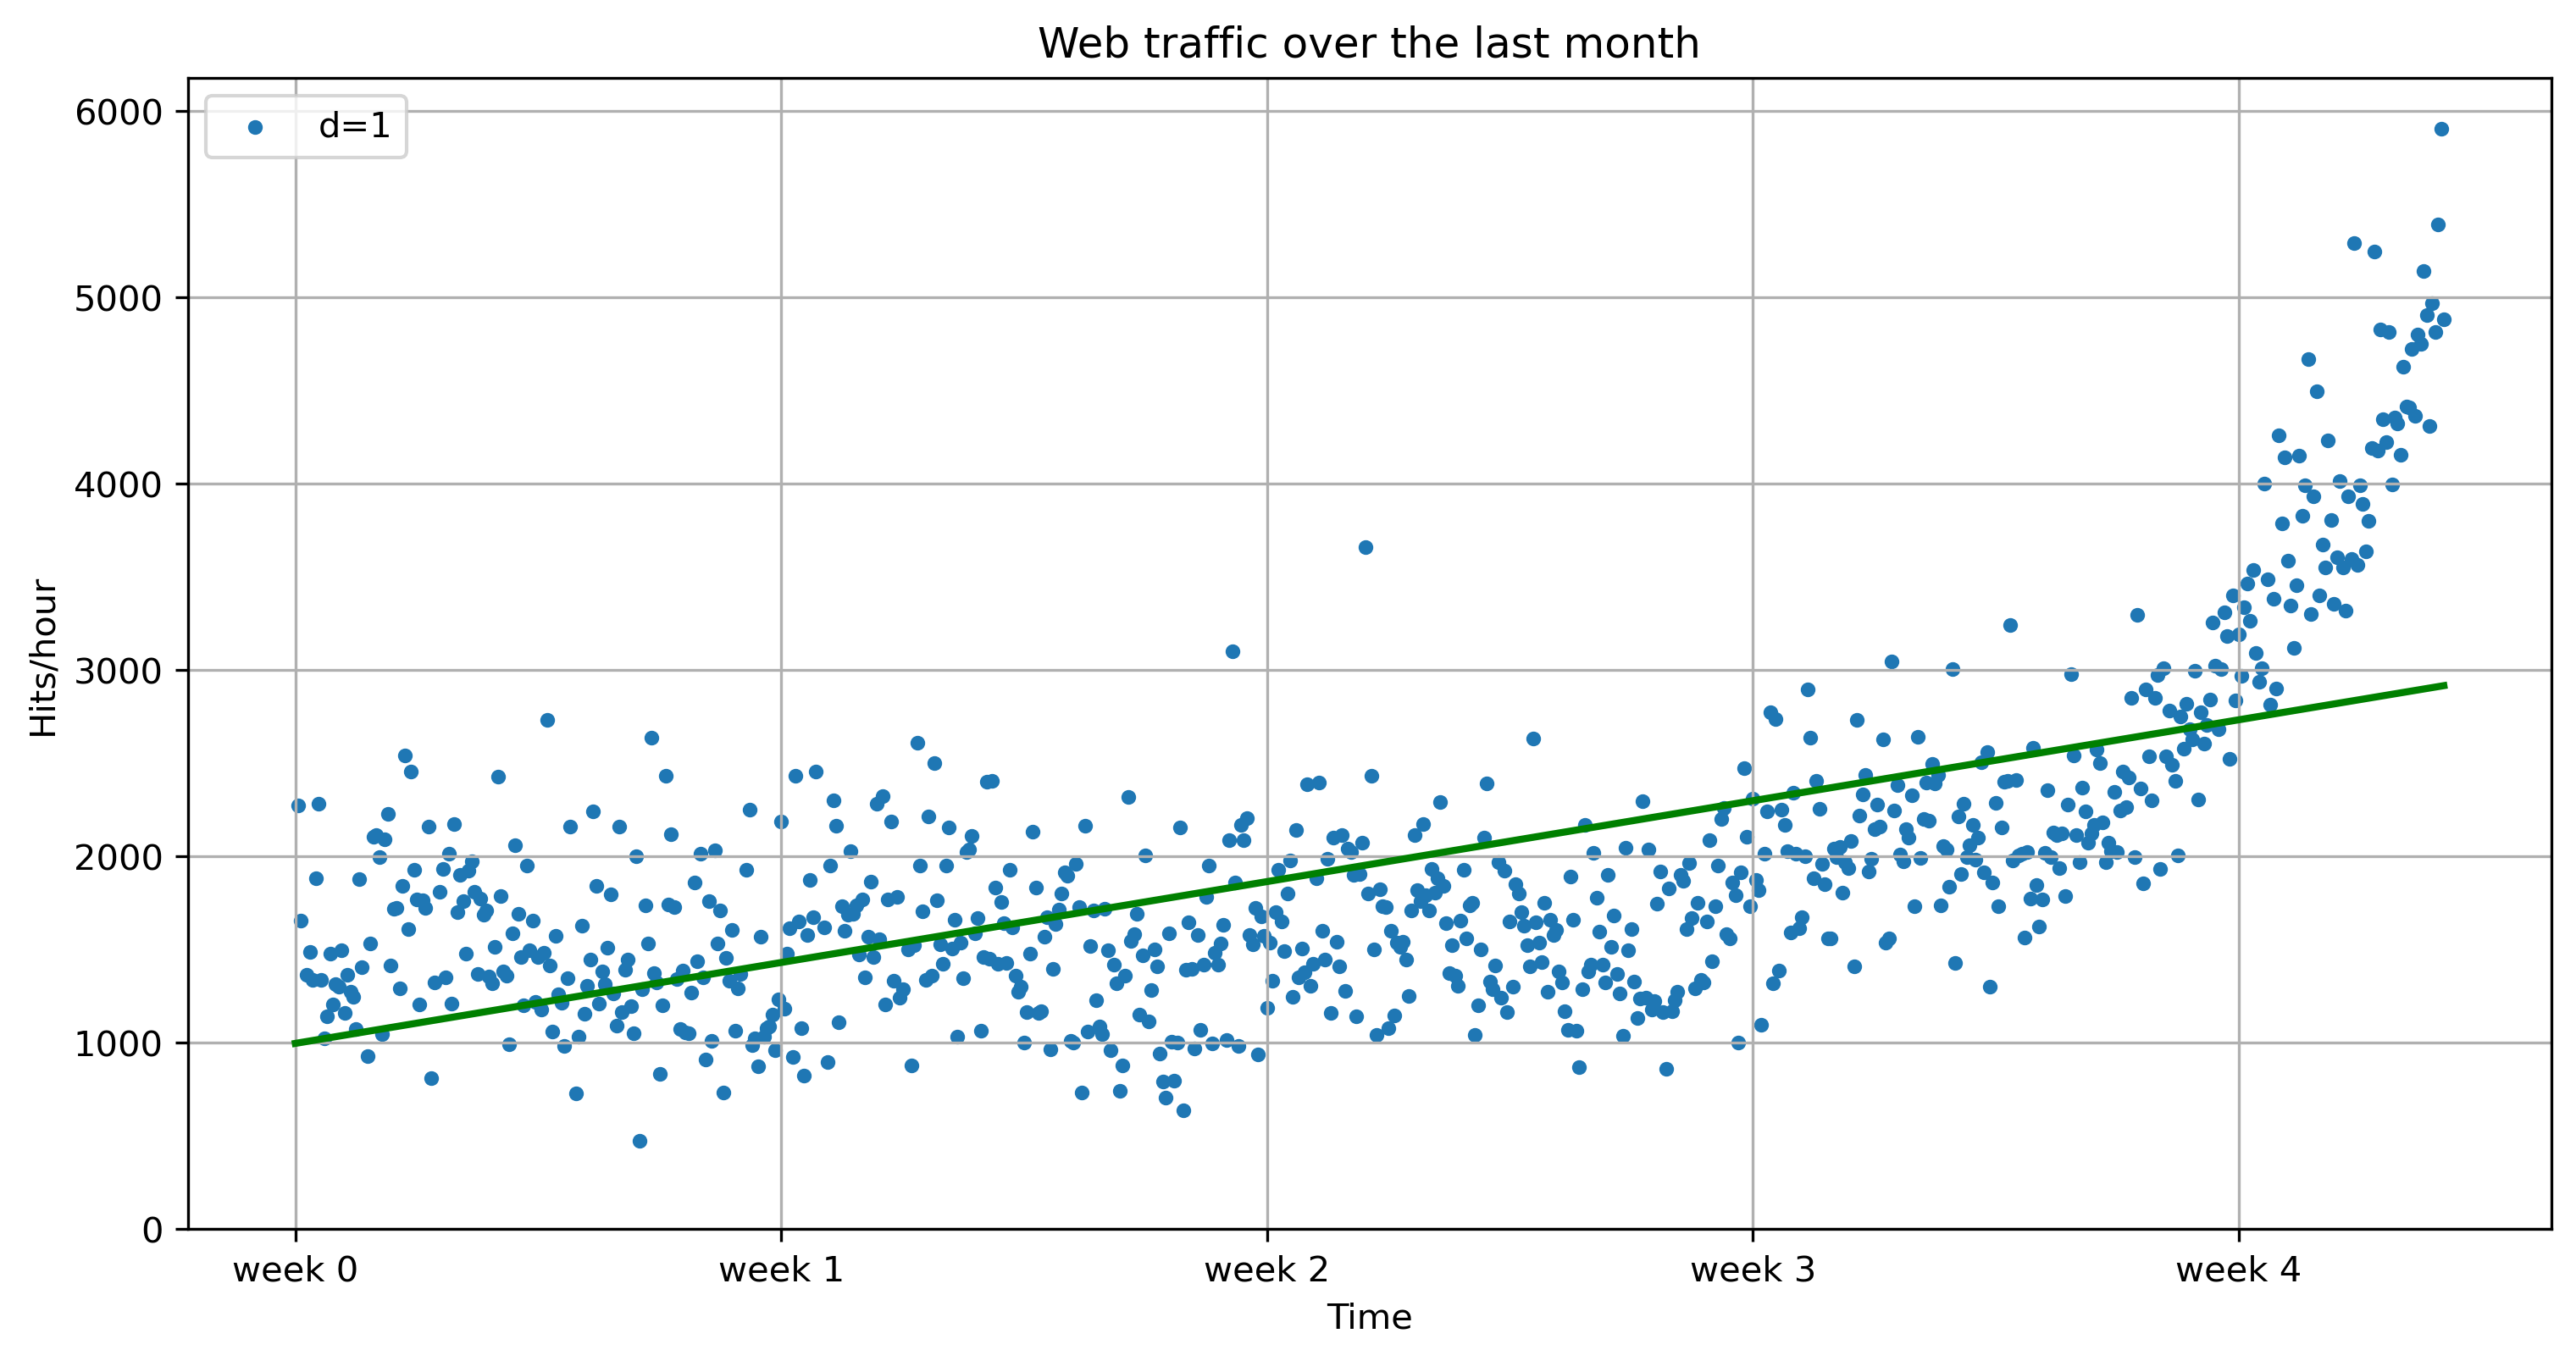

In [50]:
plot_web_traffic(x, y,[f1], fig_idx="02")

### Toward more complex models

In [51]:
f2p = np.polyfit(x, y, 2)
print(f2p)

[ 1.05605675e-02 -5.29774287e+00  1.98466917e+03]


In [52]:
f2 = np.poly1d(f2p)
print(error(f2, x, y))

181347660.76423597


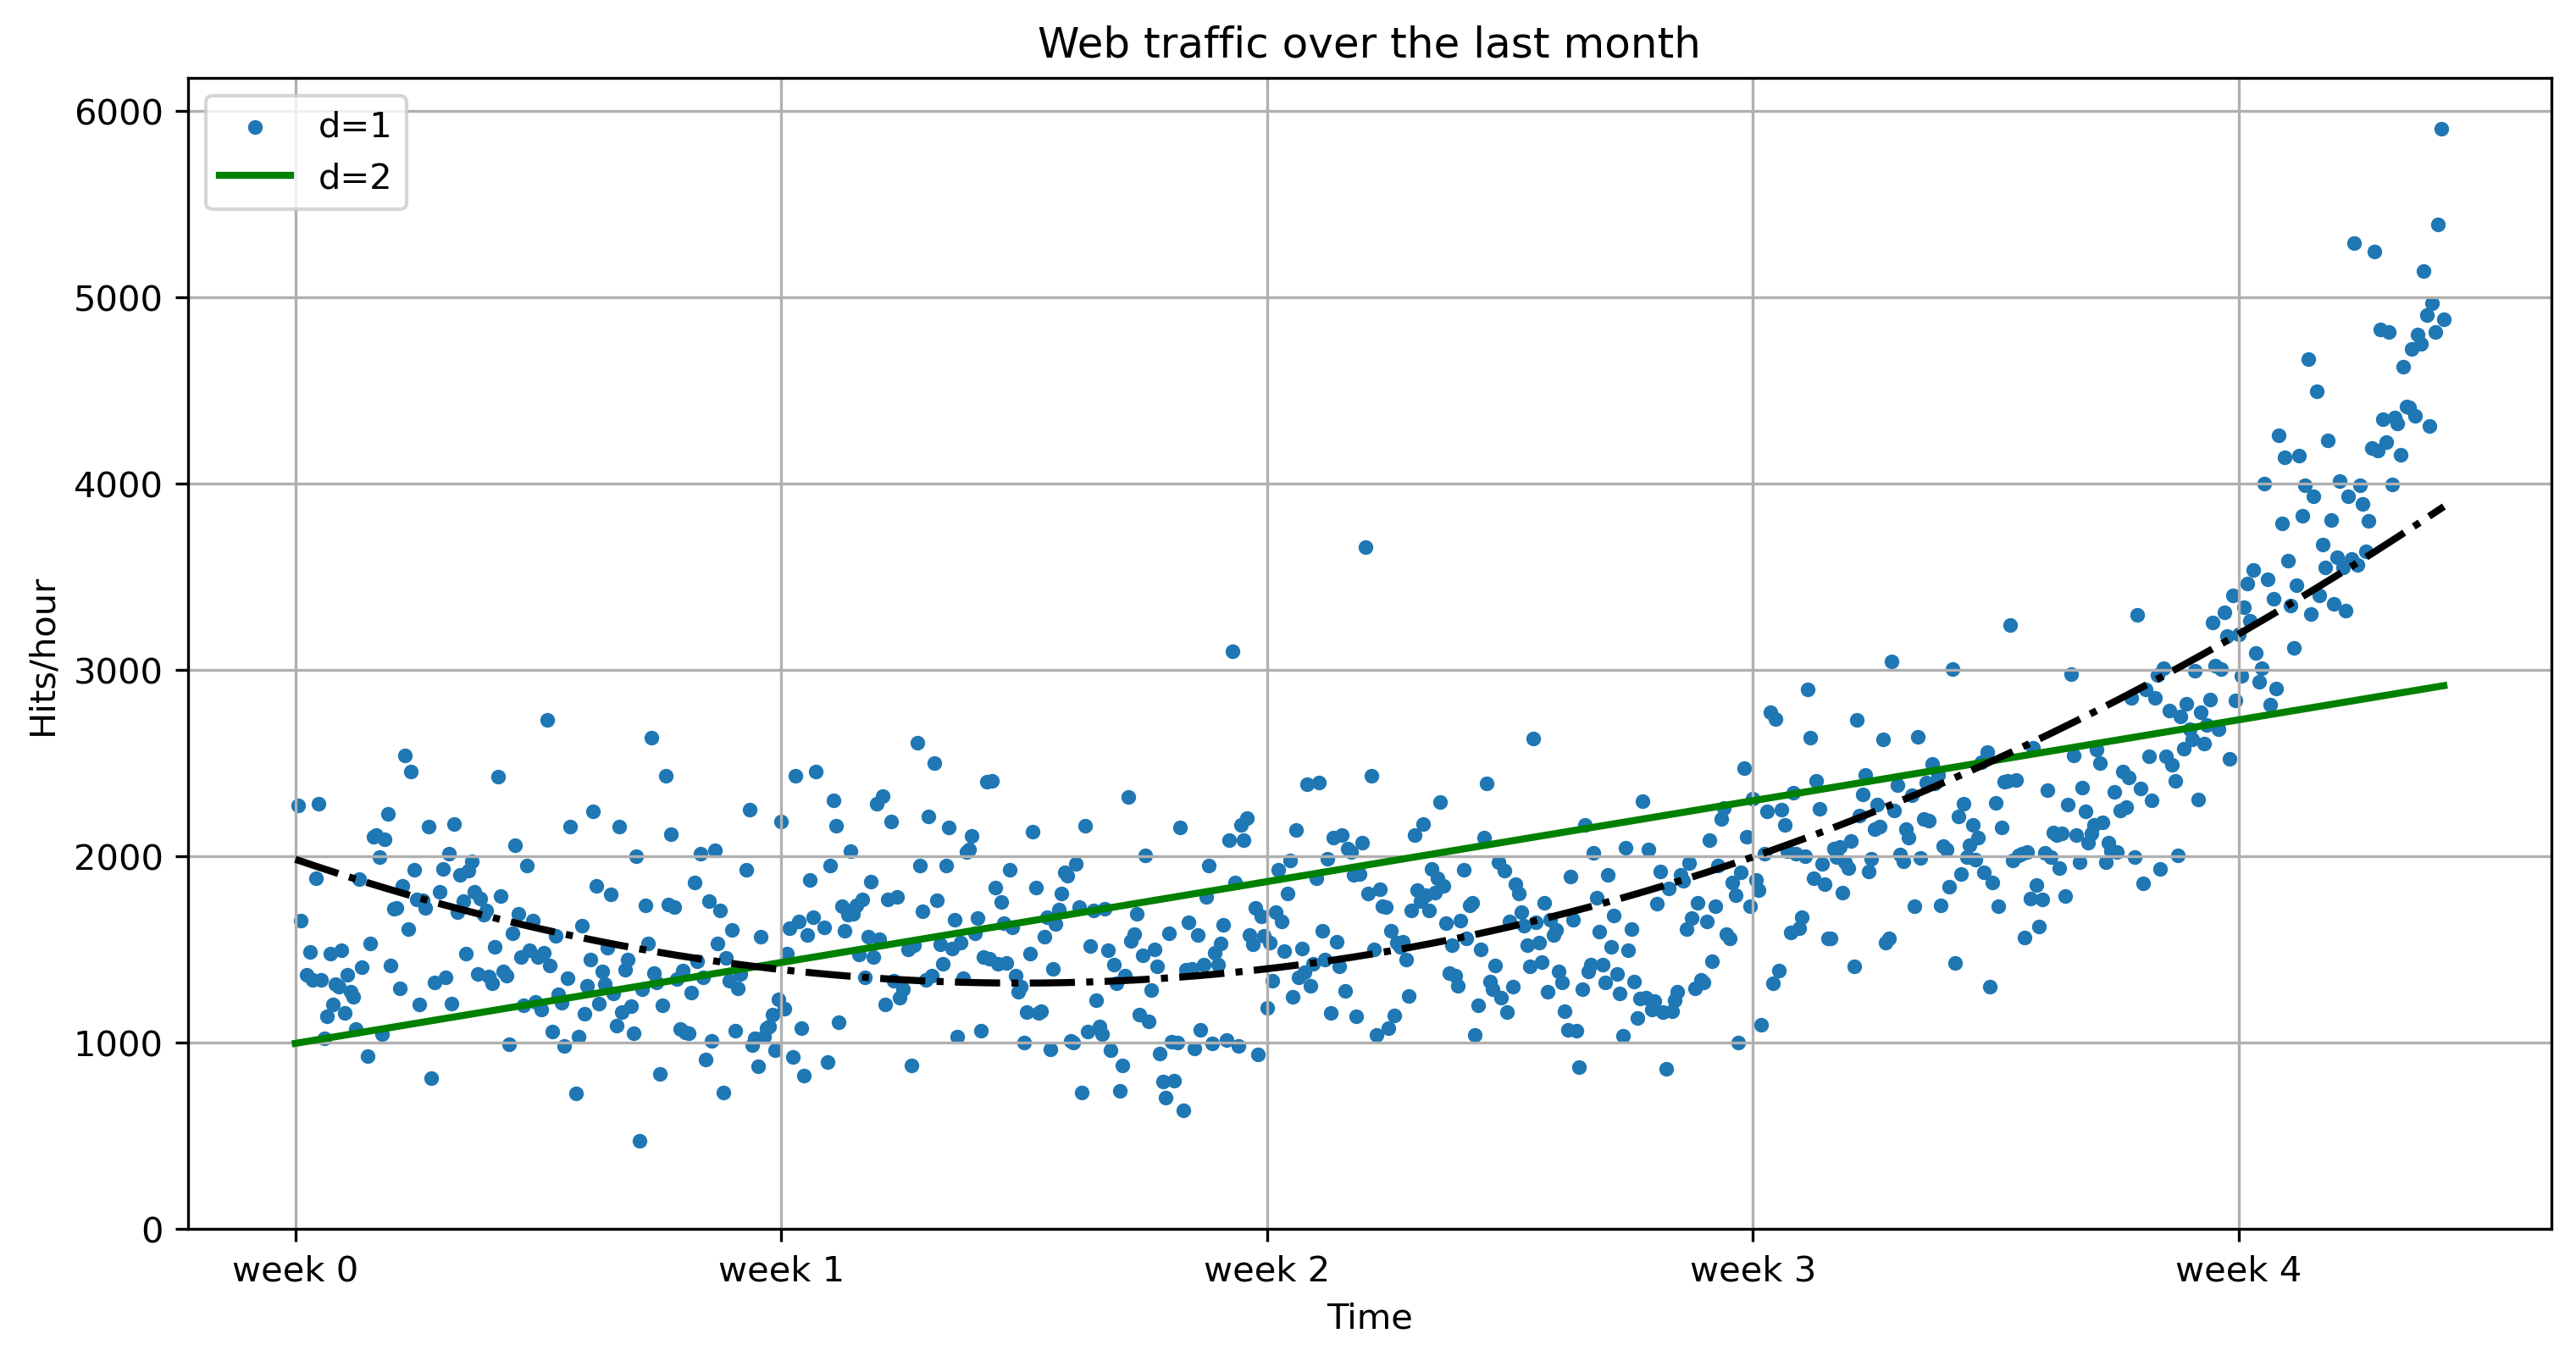

In [53]:
plot_web_traffic(x, y, [f1, f2], fig_idx="03")

In [54]:
f3 = np.poly1d(np.polyfit(x, y, 3))
f10 = np.poly1d(np.polyfit(x, y, 10))
f100 = np.poly1d(np.polyfit(x, y, 100))

C:\Users\image\anaconda3\lib\site-packages\numpy\lib\polynomial.py:658: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\image\anaconda3\lib\site-packages\numpy\core\_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\image\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


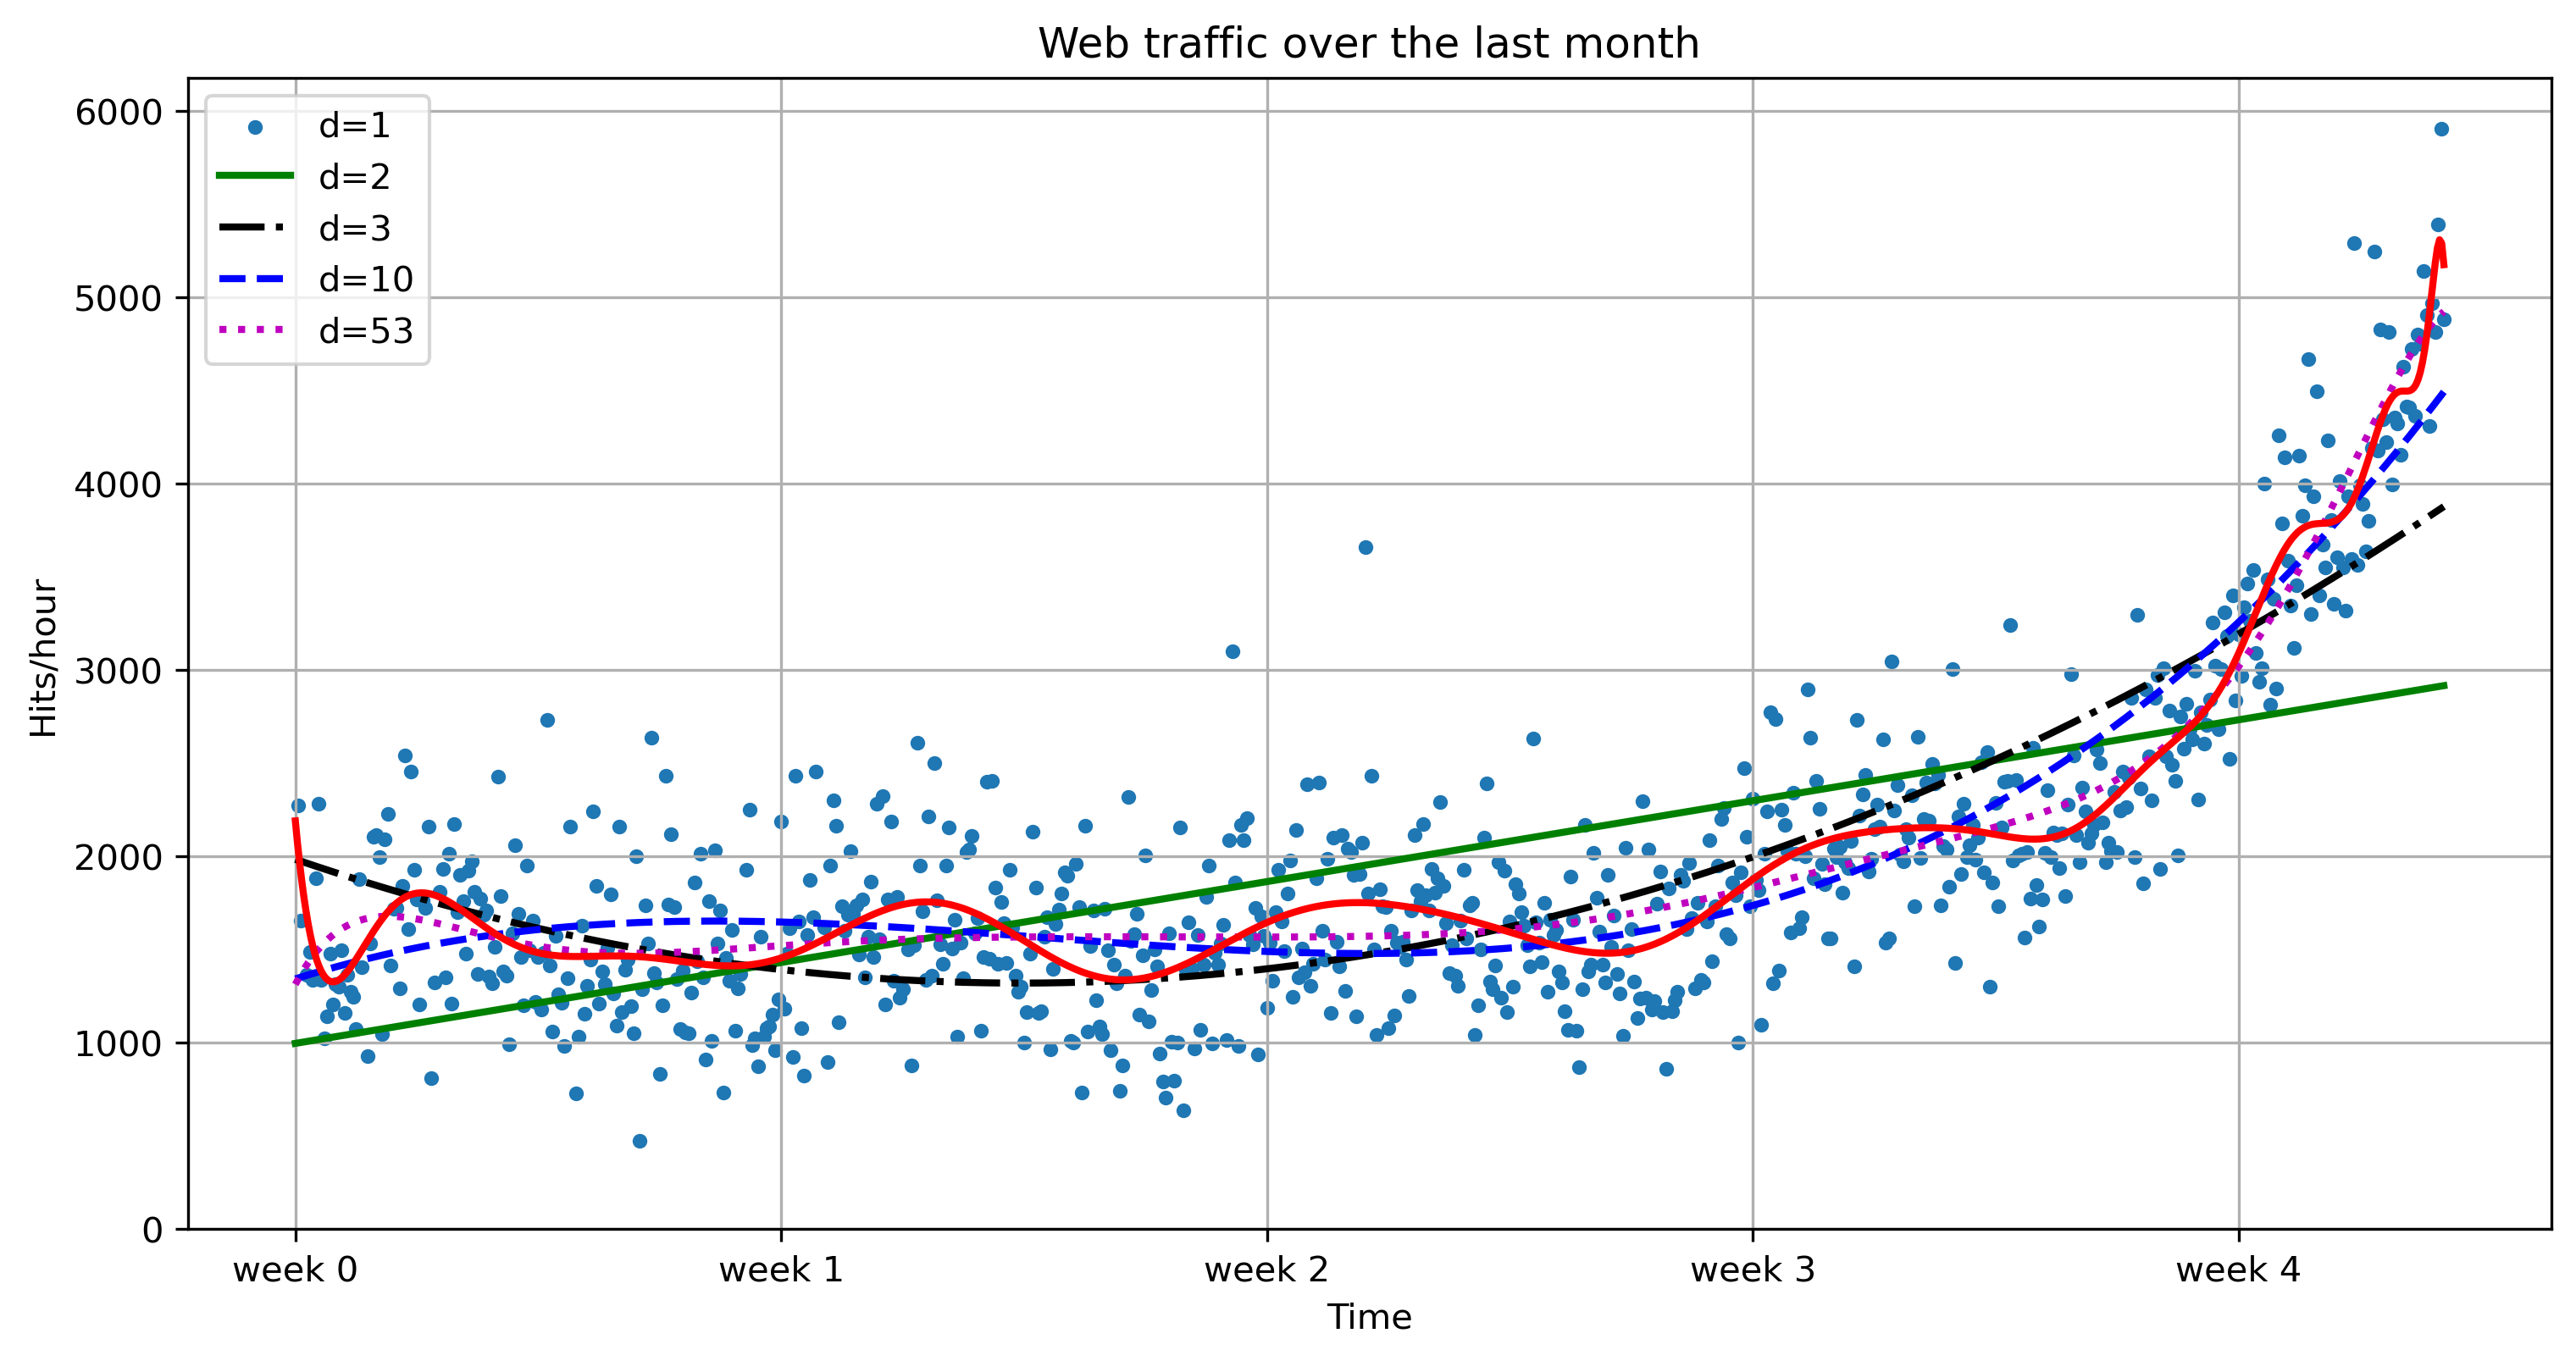

In [55]:
plot_web_traffic(x, y, [f1, f2, f3, f10, f100], fig_idx="04")

In [56]:
print("Errors for the complete data set:")
for f in [f1, f2, f3, f10, f100]:
    print("\td=%i: %f" % (f.order, error(f, x, y)))

Errors for the complete data set:
	d=1: 319531507.008126
	d=2: 181347660.764236
	d=3: 140576460.879141
	d=10: 123426935.754277
	d=53: 110768265.091659


This is overfitting.

### Stepping back to go forward - another look at our data

It seems that there is an inflection point between weeks 3 and 4. Let's separate the data and train two lines using week 3.5 as a separation point:

In [57]:
inflection = int(3.5*7*24) # calculate the inflection point in hours
xa = x[:inflection] # data before the inflection point
ya = y[:inflection]
xb = x[inflection:] # data after
yb = y[inflection:]

fa = np.poly1d(np.polyfit(xa, ya, 1))
fb = np.poly1d(np.polyfit(xb, yb, 1))

fa_error = error(fa, xa, ya)
fb_error = error(fb, xb, yb)
print("Error inflection=%f" % (fa_error + fb_error))

Error inflection=134390576.310656


In [58]:
fa = np.poly1d(np.polyfit(xa, ya, 1))
fb = np.poly1d(np.polyfit(xb, yb, 1))

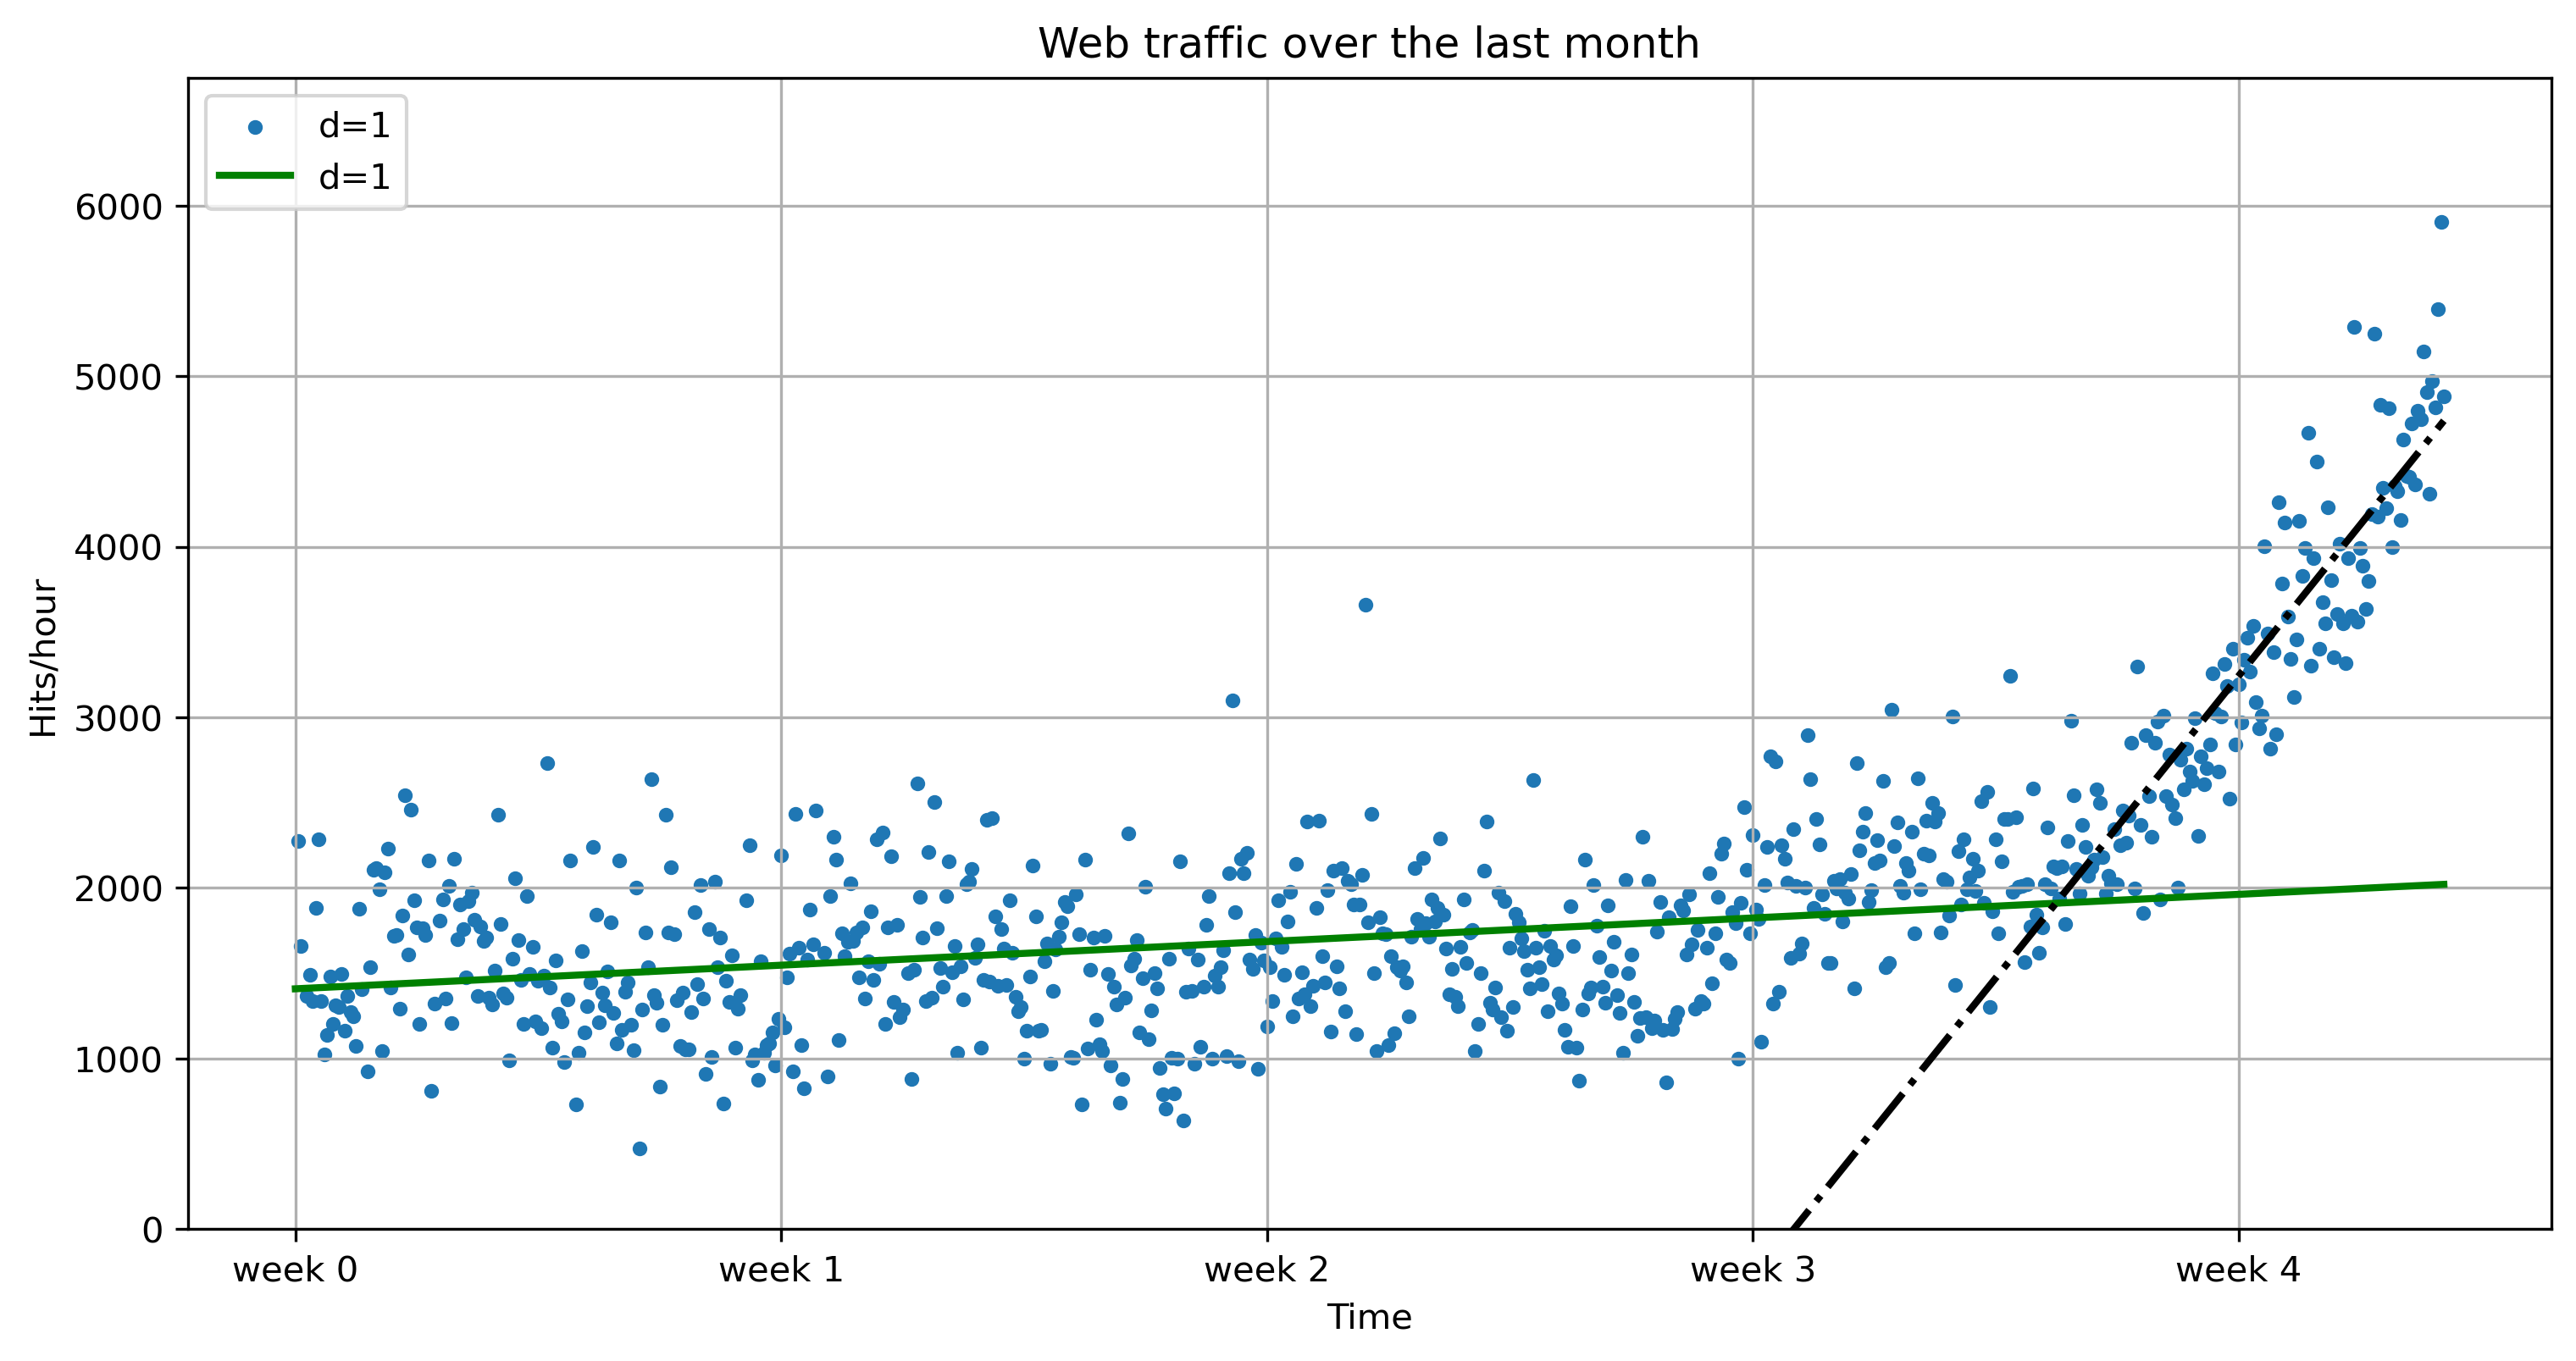

In [59]:
plot_web_traffic(x, y, [fa, fb], fig_idx="05")

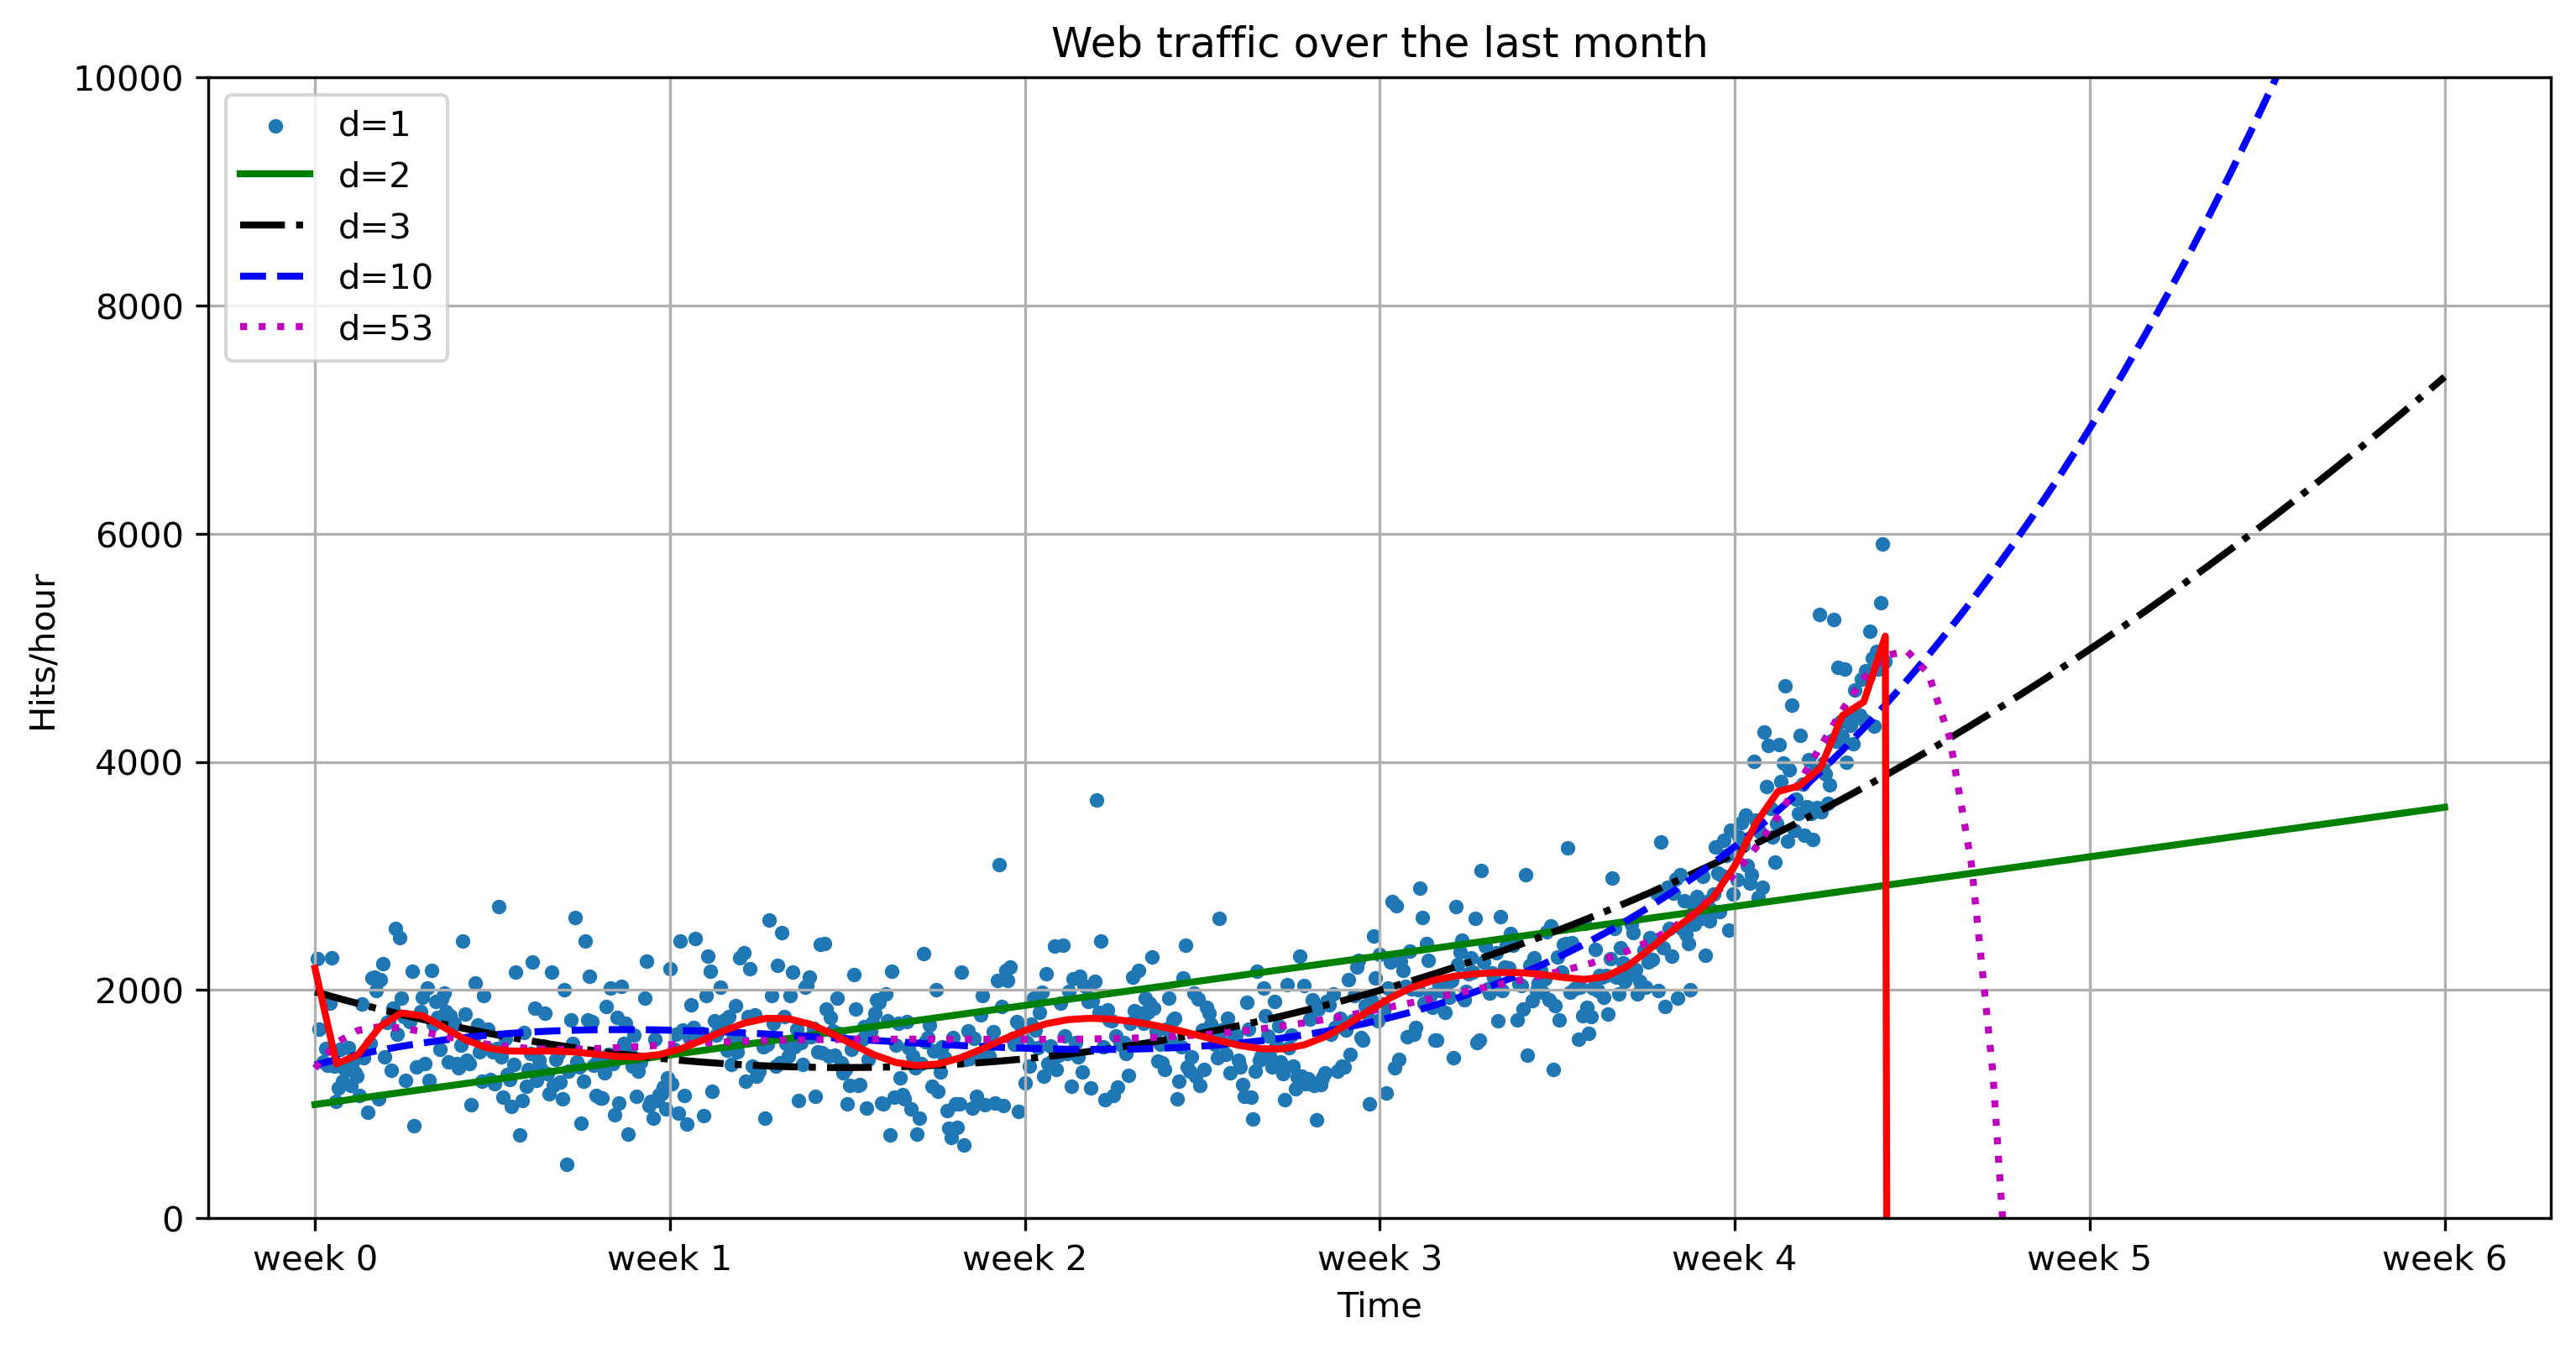

In [60]:
plot_web_traffic(x, y, [f1, f2, f3, f10, f100],
    mx=np.linspace(0, 6 * 7 * 24, 100),
    ymax=10000,
    fig_idx="06")

Let's look how they behave if we fit them only to the data of the last week.

In [61]:
fb1 = np.poly1d(np.polyfit(xb, yb, 1))
fb2 = np.poly1d(np.polyfit(xb, yb, 2))
fb3 = np.poly1d(np.polyfit(xb, yb, 3))
fb10 = np.poly1d(np.polyfit(xb, yb, 10))
fb100 = np.poly1d(np.polyfit(xb, yb, 100))

C:\Users\image\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\image\anaconda3\lib\site-packages\numpy\lib\polynomial.py:658: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\image\anaconda3\lib\site-packages\numpy\core\_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\image\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [62]:
print("Errors for only the time after inflection point")
for f in [fb1, fb2, fb3, fb10, fb100]:
    print("\td=%i: %f" % (f.order, error(f, xb, yb)))

Errors for only the time after inflection point
	d=1: 22140590.598233
	d=2: 19764355.660080
	d=3: 19762196.404203
	d=10: 18942545.410621
	d=53: 18293763.930544


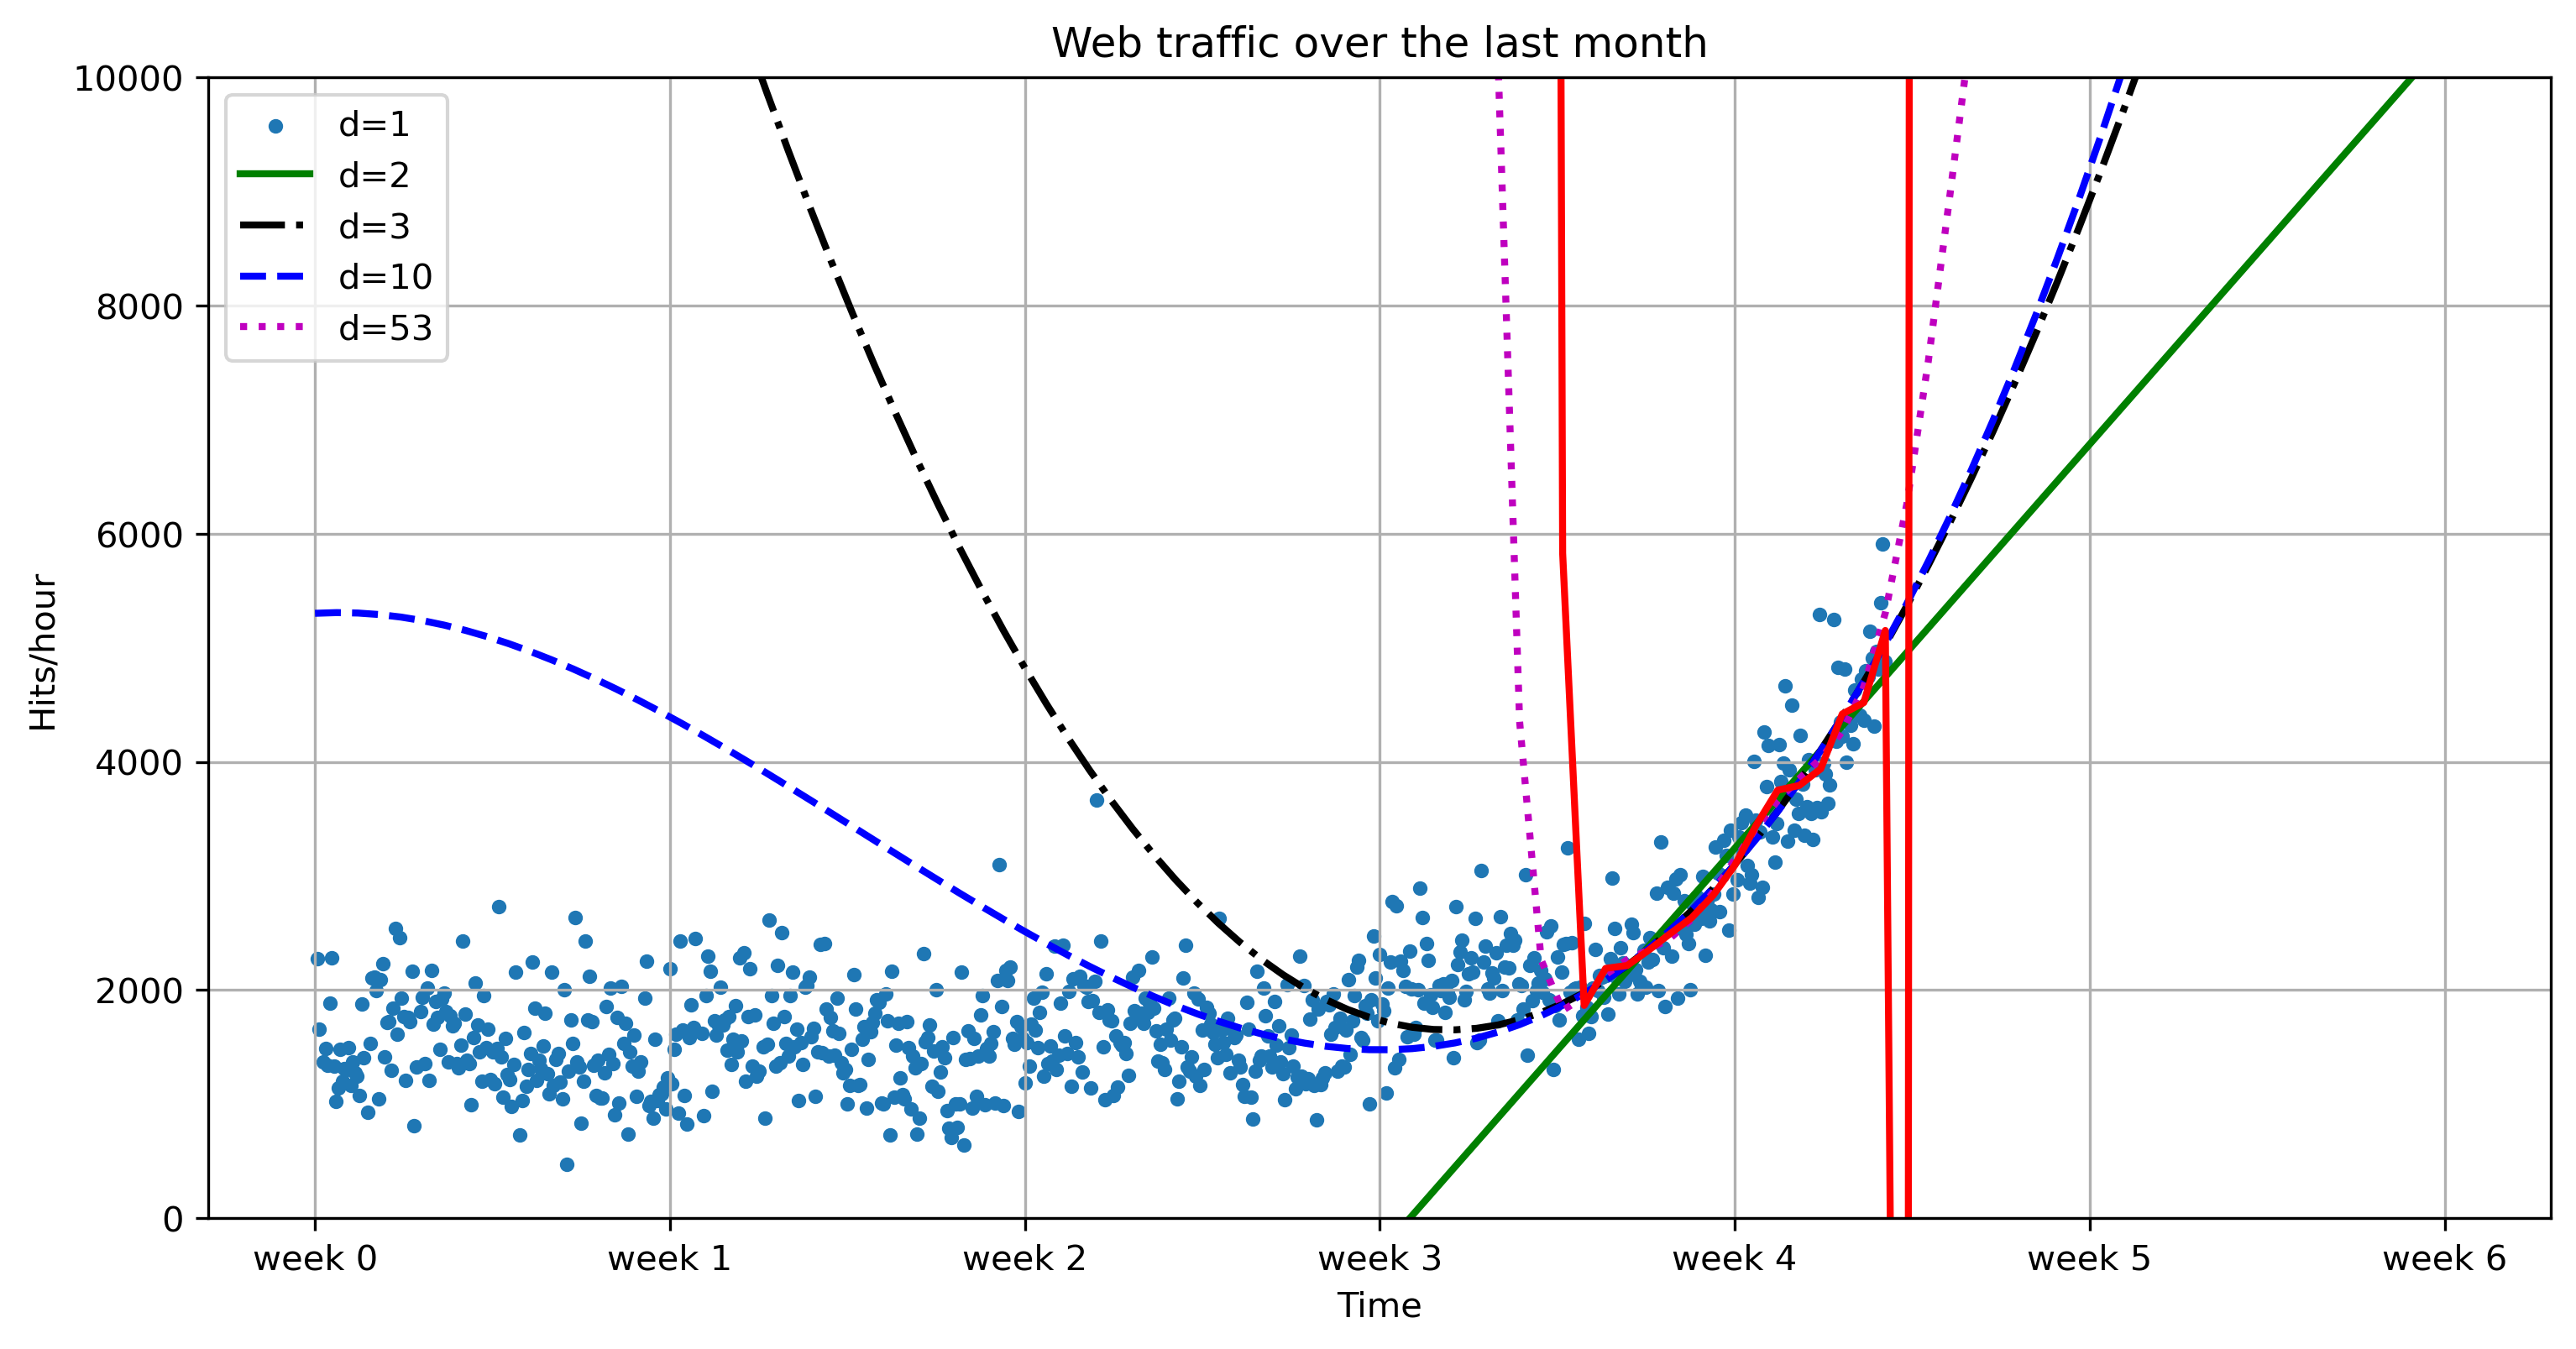

In [63]:
plot_web_traffic(
    x, y, [fb1, fb2, fb3, fb10, fb100],    
    mx=np.linspace(0, 6 * 7 * 24, 100),
    ymax=10000,
    fig_idx="07")

### Splitting training and testing
Let's use 30% of the web traffic data after the inflection point as test data that we do not train on.

In [64]:
frac = 0.3
split_idx = int(frac * len(xb))
shuffled = np.random.permutation(list(range(len(xb))))
test = sorted(shuffled[:split_idx])
train = sorted(shuffled[split_idx:])
fbt1 = np.poly1d(np.polyfit(xb[train], yb[train], 1))
fbt2 = np.poly1d(np.polyfit(xb[train], yb[train], 2))
print("fbt2(x)= \n%s" % fbt2)
print("fbt2(x)-100,000= \n%s" % (fbt2-100000))
fbt3 = np.poly1d(np.polyfit(xb[train], yb[train], 3))
fbt10 = np.poly1d(np.polyfit(xb[train], yb[train], 10))
fbt100 = np.poly1d(np.polyfit(xb[train], yb[train], 100))

print("Test errors for only the time after inflection point")
for f in [fbt1, fbt2, fbt3, fbt10, fbt100]:
    print("Error d=%i: %f" % (f.order, error(f, xb[test], yb[test])))


fbt2(x)= 
         2
0.05404 x - 50.39 x + 1.262e+04
fbt2(x)-100,000= 
         2
0.05404 x - 50.39 x - 8.738e+04
Test errors for only the time after inflection point
Error d=1: 6492812.705336
Error d=2: 5008335.504620
Error d=3: 5006519.831510
Error d=10: 5440887.312585
Error d=53: 5369500.475302


C:\Users\image\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\image\anaconda3\lib\site-packages\numpy\lib\polynomial.py:658: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\image\anaconda3\lib\site-packages\numpy\core\_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\image\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Errors for only the time after inflection point
	d=1: 22140590.598233
	d=2: 19764355.660080
	d=3: 19762196.404203
	d=10: 18942545.410621
	d=53: 18293763.930544


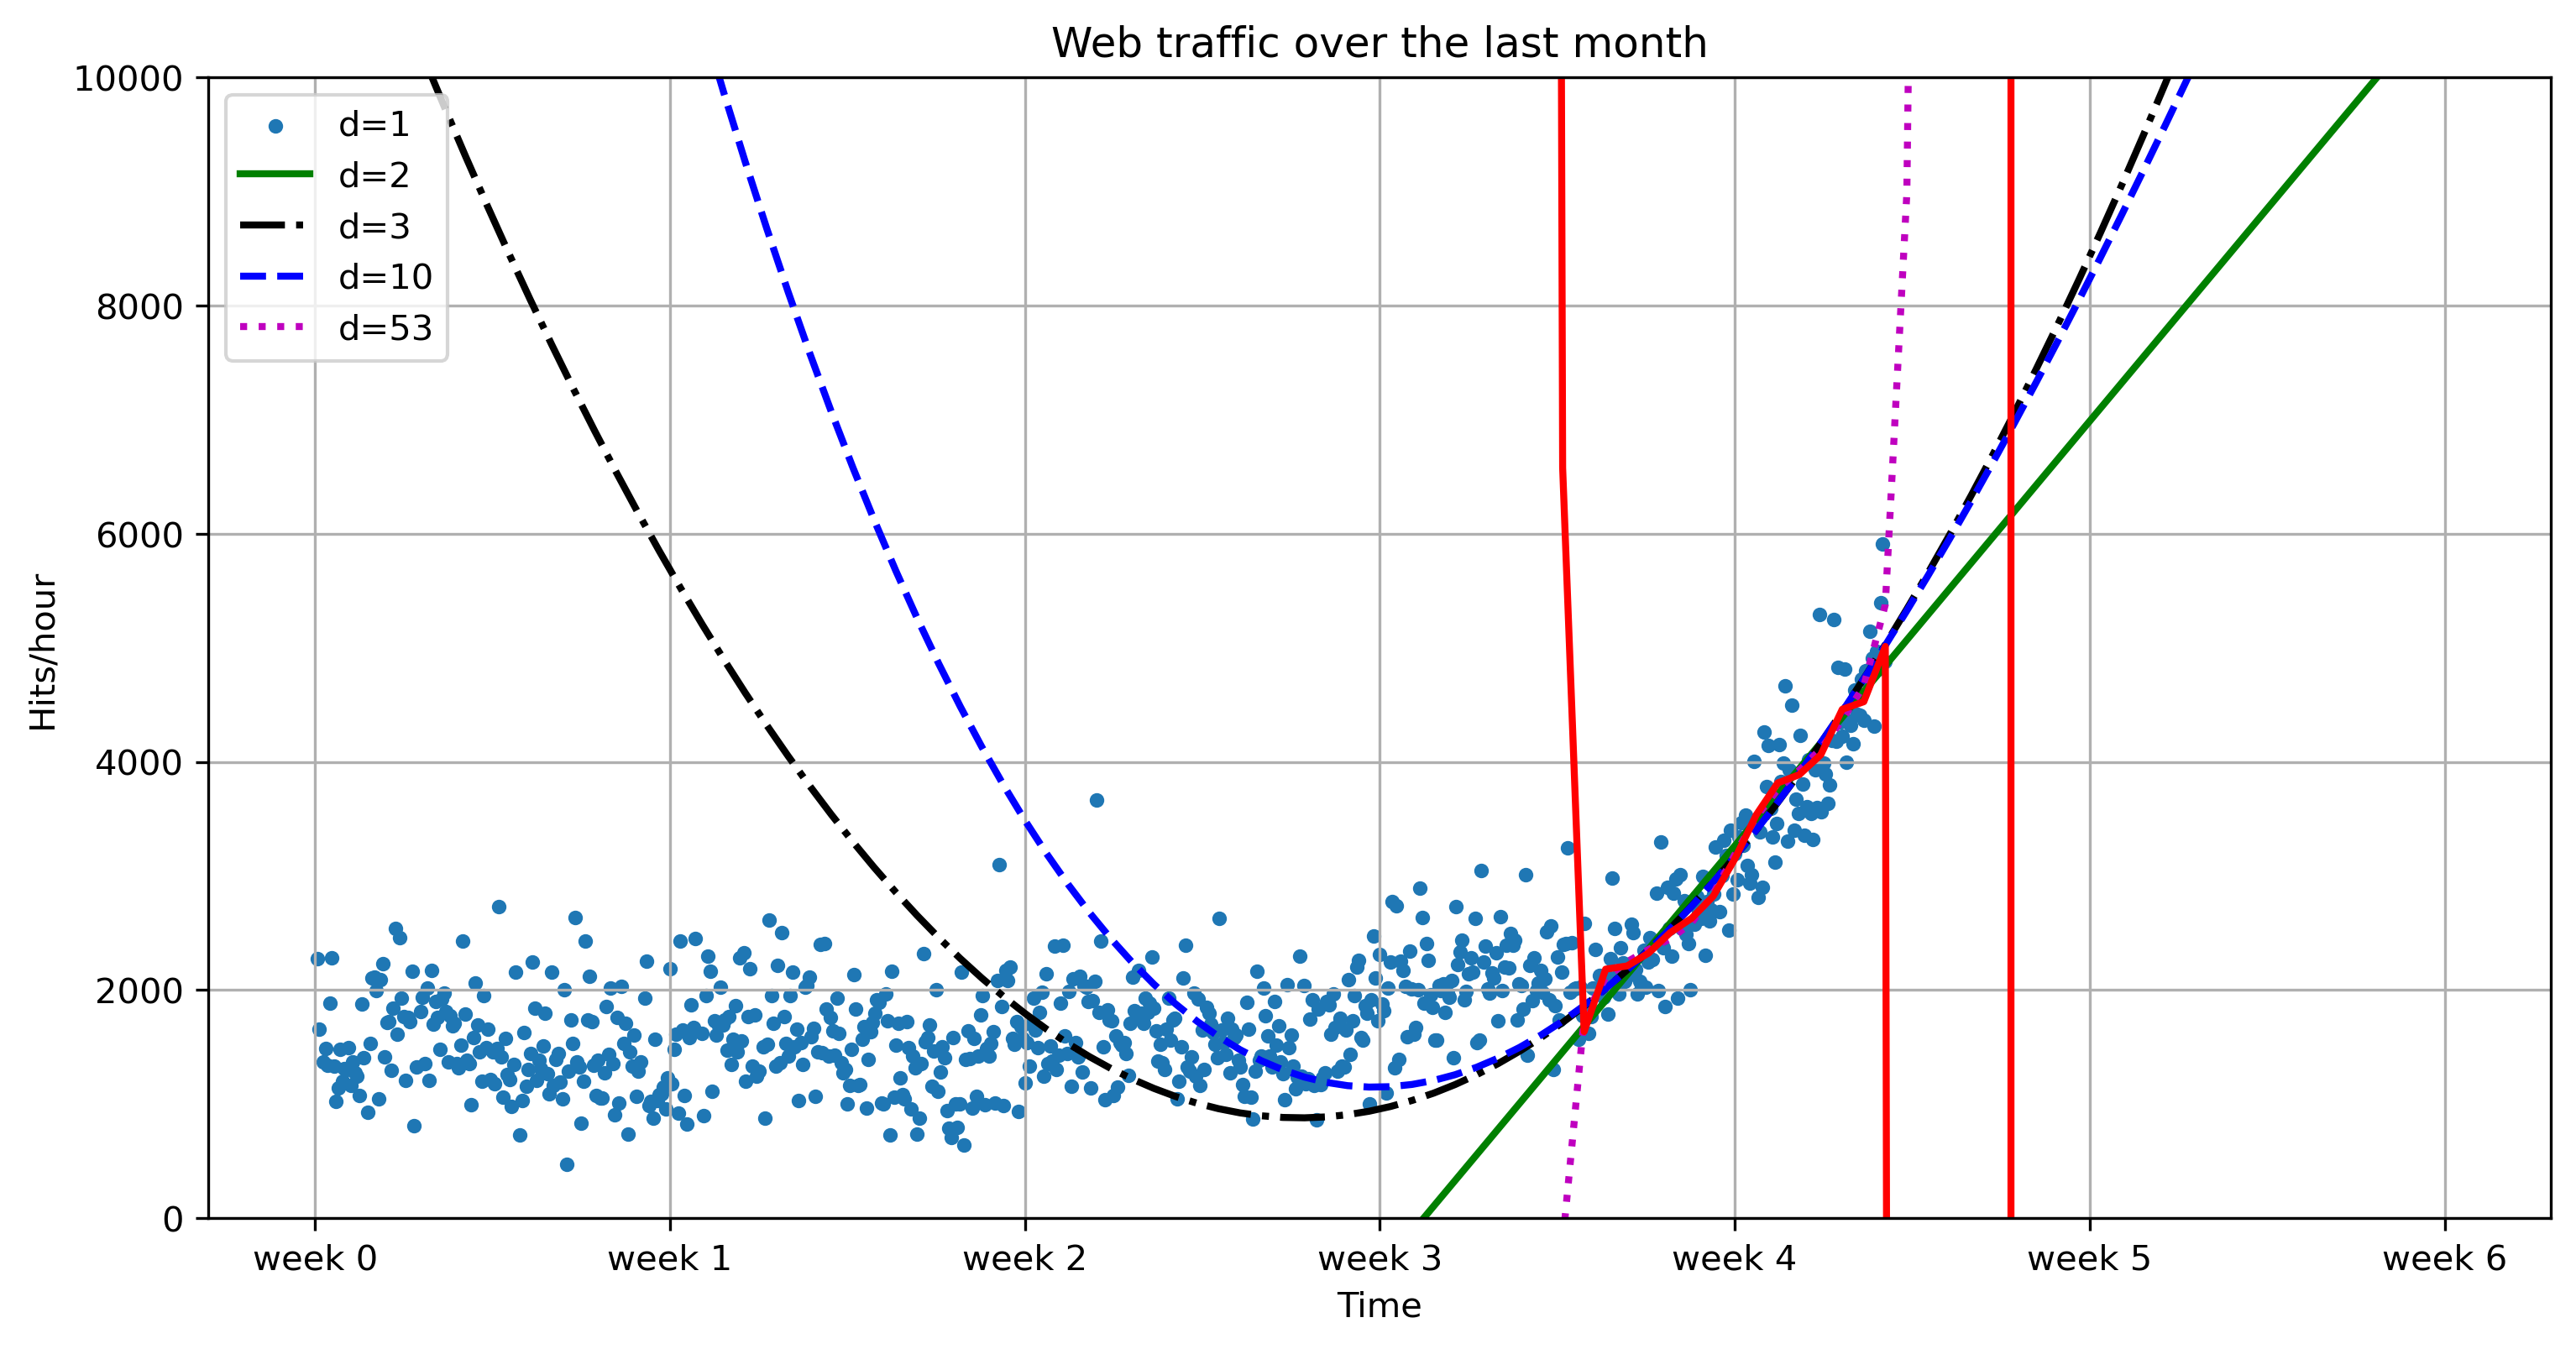

In [65]:
print("Errors for only the time after inflection point")
for f in [fb1, fb2, fb3, fb10, fb100]:
    print("\td=%i: %f" % (f.order, error(f, xb, yb)))

plot_web_traffic(
    x, y, [fbt1, fbt2, fbt3, fbt10, fbt100],    
    mx=np.linspace(0, 6 * 7 * 24, 100),
    ymax=10000,
    fig_idx="08")

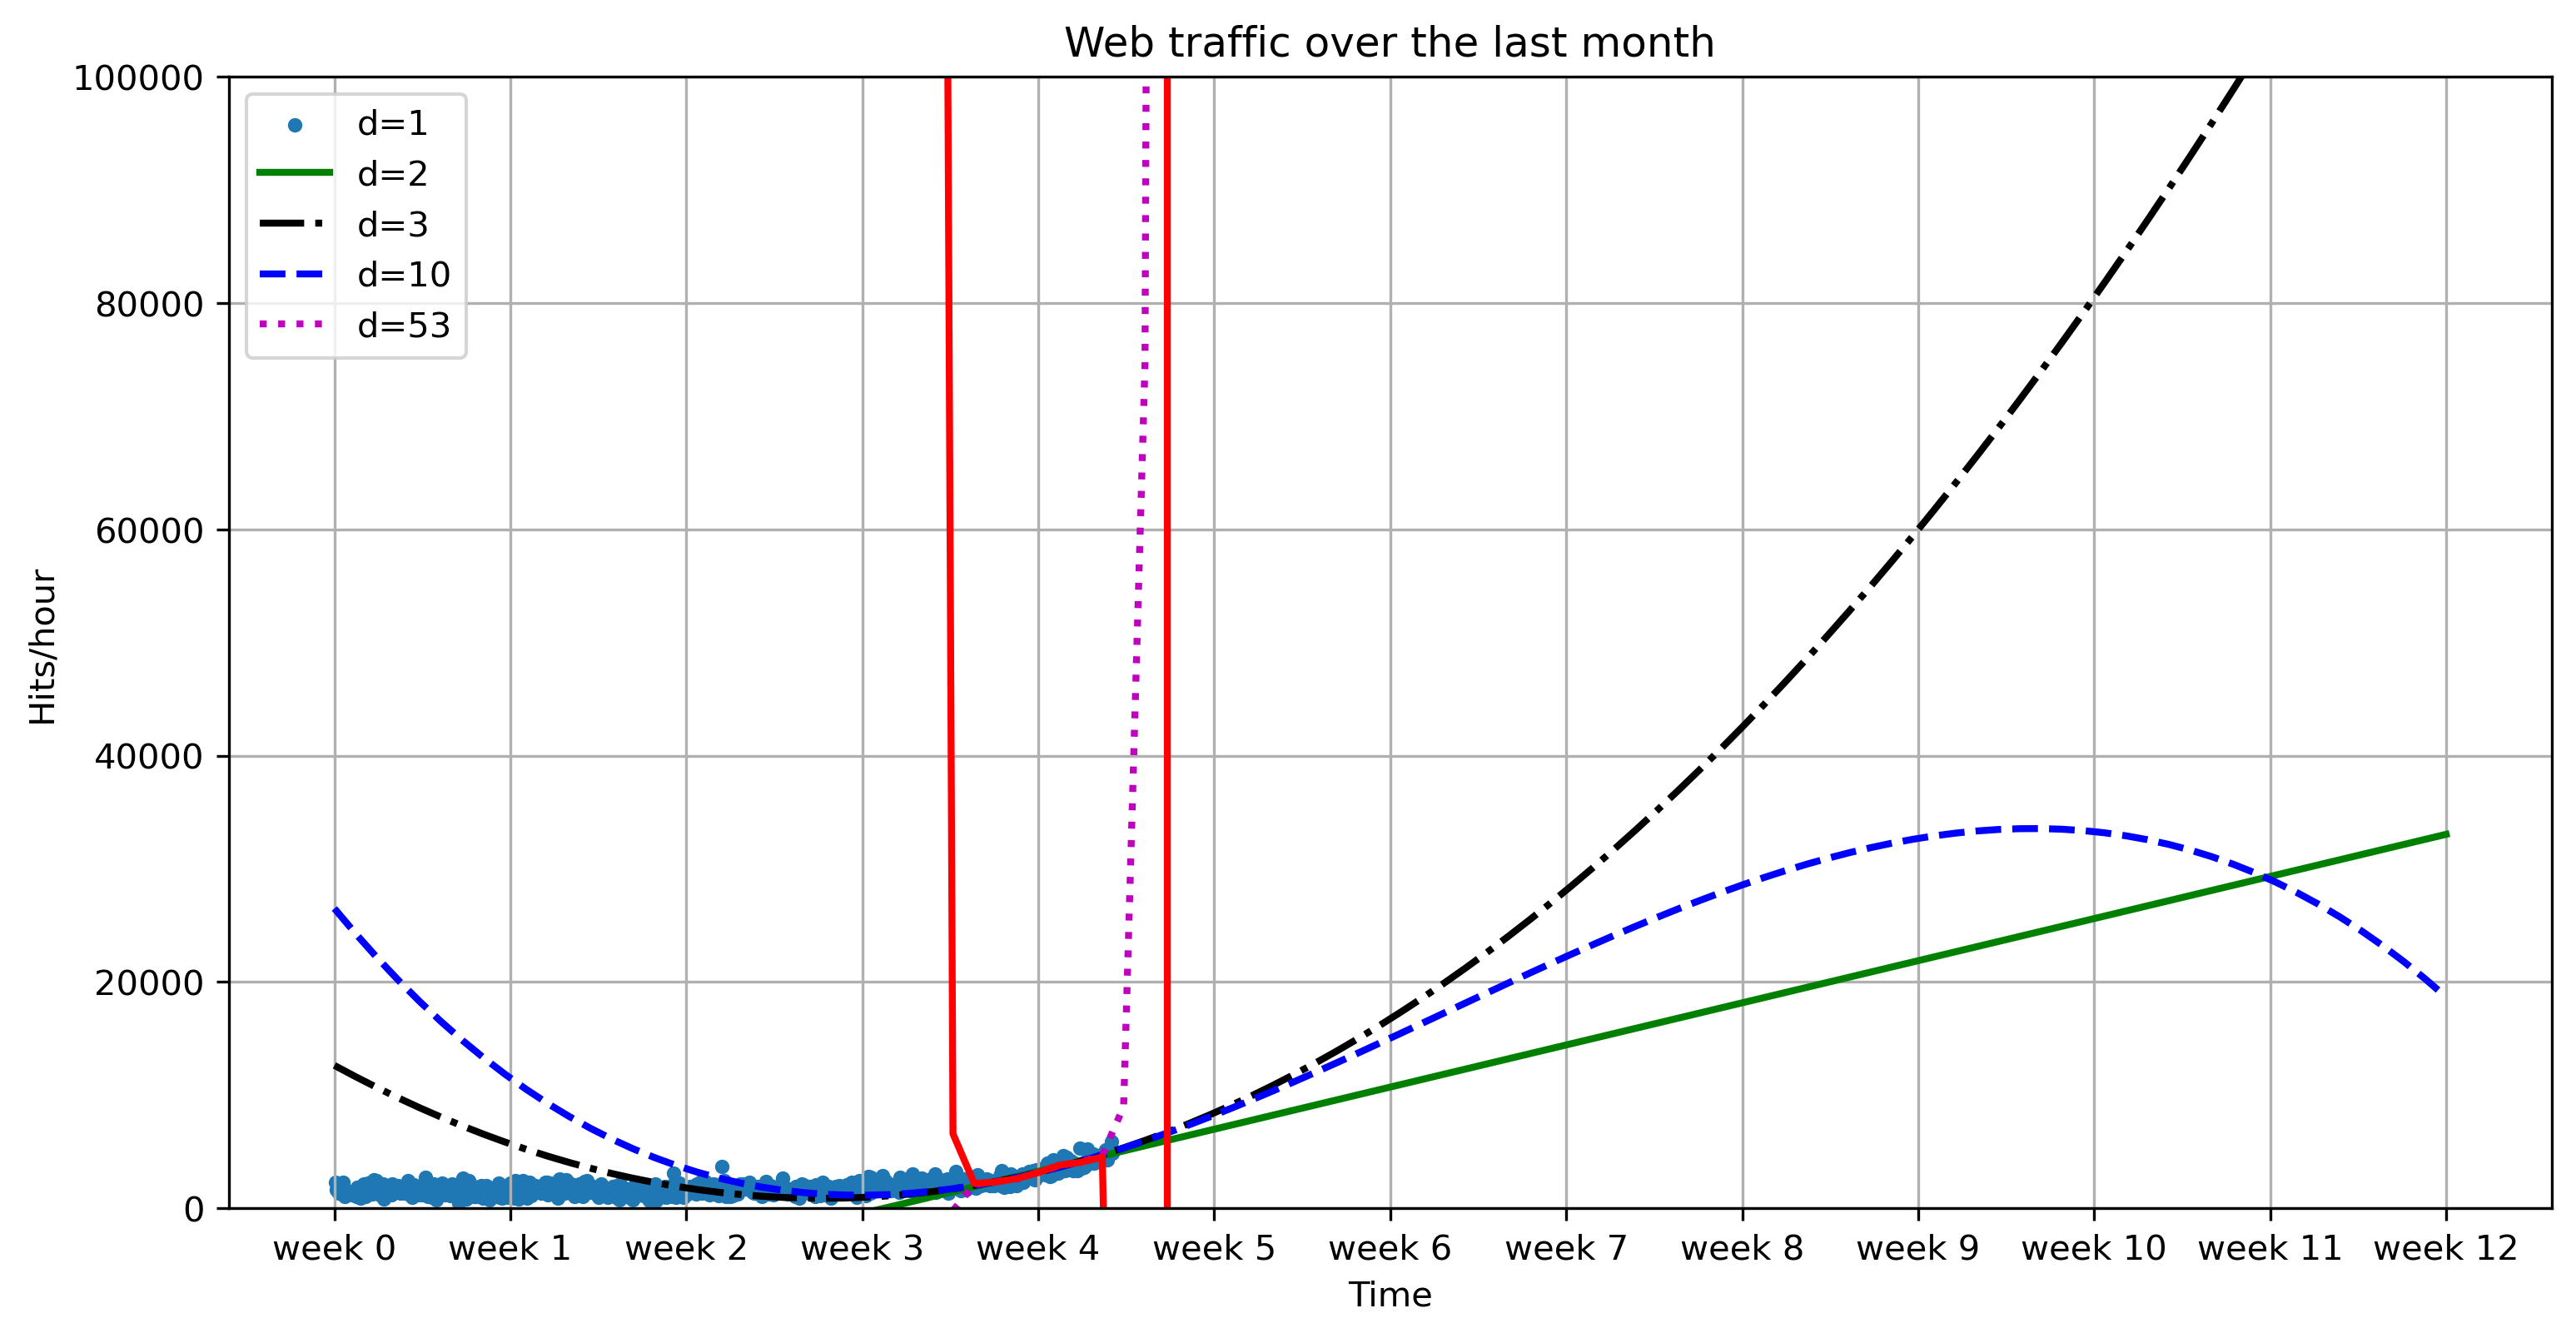

In [66]:
plot_web_traffic(
    x, y, [fbt1, fbt2, fbt3, fbt10, fbt100],    
    mx=np.linspace(0, 12 * 7 * 24, 100),
    ymax=100000,
    fig_idx="09")

### When will we hit 100000 hits per hour?

In [67]:
fbt2 = np.poly1d(np.polyfit(xb[train], yb[train], 2))
print("fbt2(x)= \n%s" % fbt2)
print("fbt2(x)-100,000= \n%s" % (fbt2-100000))

from scipy.optimize import fsolve
reached_max = fsolve(fbt2-100000, x0=800)/(7*24)
print("100,000 hits/hour expected at week %f" % reached_max[0])

fbt2(x)= 
         2
0.05404 x - 50.39 x + 1.262e+04
fbt2(x)-100,000= 
         2
0.05404 x - 50.39 x - 8.738e+04
100,000 hits/hour expected at week 10.836350


---